In [6]:
import placetmachine as pl
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import os
import random
import pandas as pd

In [2]:
clic = pl.Machine()

#+++++++++++Beamline creation+++++++++++
cavity_structure = {
    'a': 3.33e-3,
    'g': 6.4e-3,
    'l': 8.33333e-3,
    'delta': 0.18,
    'delta_g': 0.5e-3,
    'phase': 8.0, 
    'frac_lambda': 0.25, 
    'scale': 1.0
}
clic.create_beamline("Lattices/1000_db_ml_mod.tcl", name = "ml", cavities_setup = cavity_structure)

#+++++++++++Beam creation+++++++++++
beam_parameters =  {
    'emitt_x': 8.0,
    'emitt_y': 0.1,
    'e_spread': 1.6,
    'e_initial': 9.0,
    'sigma_z': 70, 
    'phase': 0.0,
    'charge': 5.2e9,
    'beta_x': 8.054208256047598,
    'beta_y': 1.201443036029169,
    'alpha_x': 2.455451375064132e-02,
    'alpha_y': 6.250882009649877e-03,
    'n_total': 500
}
main_beam = clic.make_beam_slice_energy_gradient("main_beam", 11, 5, 1.0, 1.0, 1111, **beam_parameters)


Output()

********************************************************************************
**                                                                            **
**                       PLACET Version No 1.0.5 (SWIG)                       **
**                           written by D. Schulte                            **
**                             contributions from                             **
**                            A. Latina, N. Leros,                            **
**                           P. Eliasson, E. Adli,                            **
**                          B. Dalena, J. Snuverink,                          **
**                           Y. Levinsen, J. Esberg                           **
**                                                                            **
**                             THIS VERSION INFO:                             **
**                         Octave interface enabled                           **
**                         P

[13:00:16] Beamline created                                                                           ]8;id=54820;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py\machine.py]8;;\:]8;id=921338;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py#69\69]8;;\

Output()

           Beam created                                                                               ]8;id=819965;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py\machine.py]8;;\:]8;id=843085;file:///home/andrii/anaconda2/lib/python3.7/site-packages/placetmachine/machine.py#69\69]8;;\

In [128]:
def gather_data3(folder, supress_output = False):
    data = []
    _start, _end = 0, 2062

    feature_id = _start
    
    for i, filename in enumerate(os.listdir(folder)):
        with open(os.path.join(folder, filename), 'rb') as file:
            row_data = pk.load(file)

            data.append(row_data)
    if not supress_output:
        print(f"Found {i + 1} files.")
    
    res = pd.DataFrame(data)
    return res

In [116]:
FOLDER = "Y1_threshold_variance"

tmp = gather_data3(FOLDER)
treshold_variance_stats = tmp.sort_values(by = ['n_features'])
treshold_variance_stats['problem_loss'] = treshold_variance_stats.total_loss - treshold_variance_stats.orbit_loss - treshold_variance_stats.zero_loss - treshold_variance_stats.exit_orbit_loss

print(treshold_variance_stats)

Found 59 files.
         Regularization         alpha  n_features  \
54  regularizer_mod_5_4  5.000000e-07           2   
30  regularizer_mod_5_4  5.000000e-07           4   
28  regularizer_mod_5_4  5.000000e-07           5   
2   regularizer_mod_5_4  5.000000e-07           5   
46  regularizer_mod_5_4  5.000000e-07           6   
15  regularizer_mod_5_4  5.000000e-07           6   
11  regularizer_mod_5_4  5.000000e-07           6   
55  regularizer_mod_5_4  5.000000e-07           8   
14  regularizer_mod_5_4  5.000000e-07           8   
0   regularizer_mod_5_4  5.000000e-07           8   
8   regularizer_mod_5_4  5.000000e-07           8   
32  regularizer_mod_5_4  5.000000e-07          11   
47  regularizer_mod_5_4  5.000000e-07          13   
45  regularizer_mod_5_4  5.000000e-07          15   
39  regularizer_mod_5_4  5.000000e-07          17   
50  regularizer_mod_5_4  5.000000e-07          18   
37  regularizer_mod_5_4  5.000000e-07          19   
40  regularizer_mod_5_4  5.000

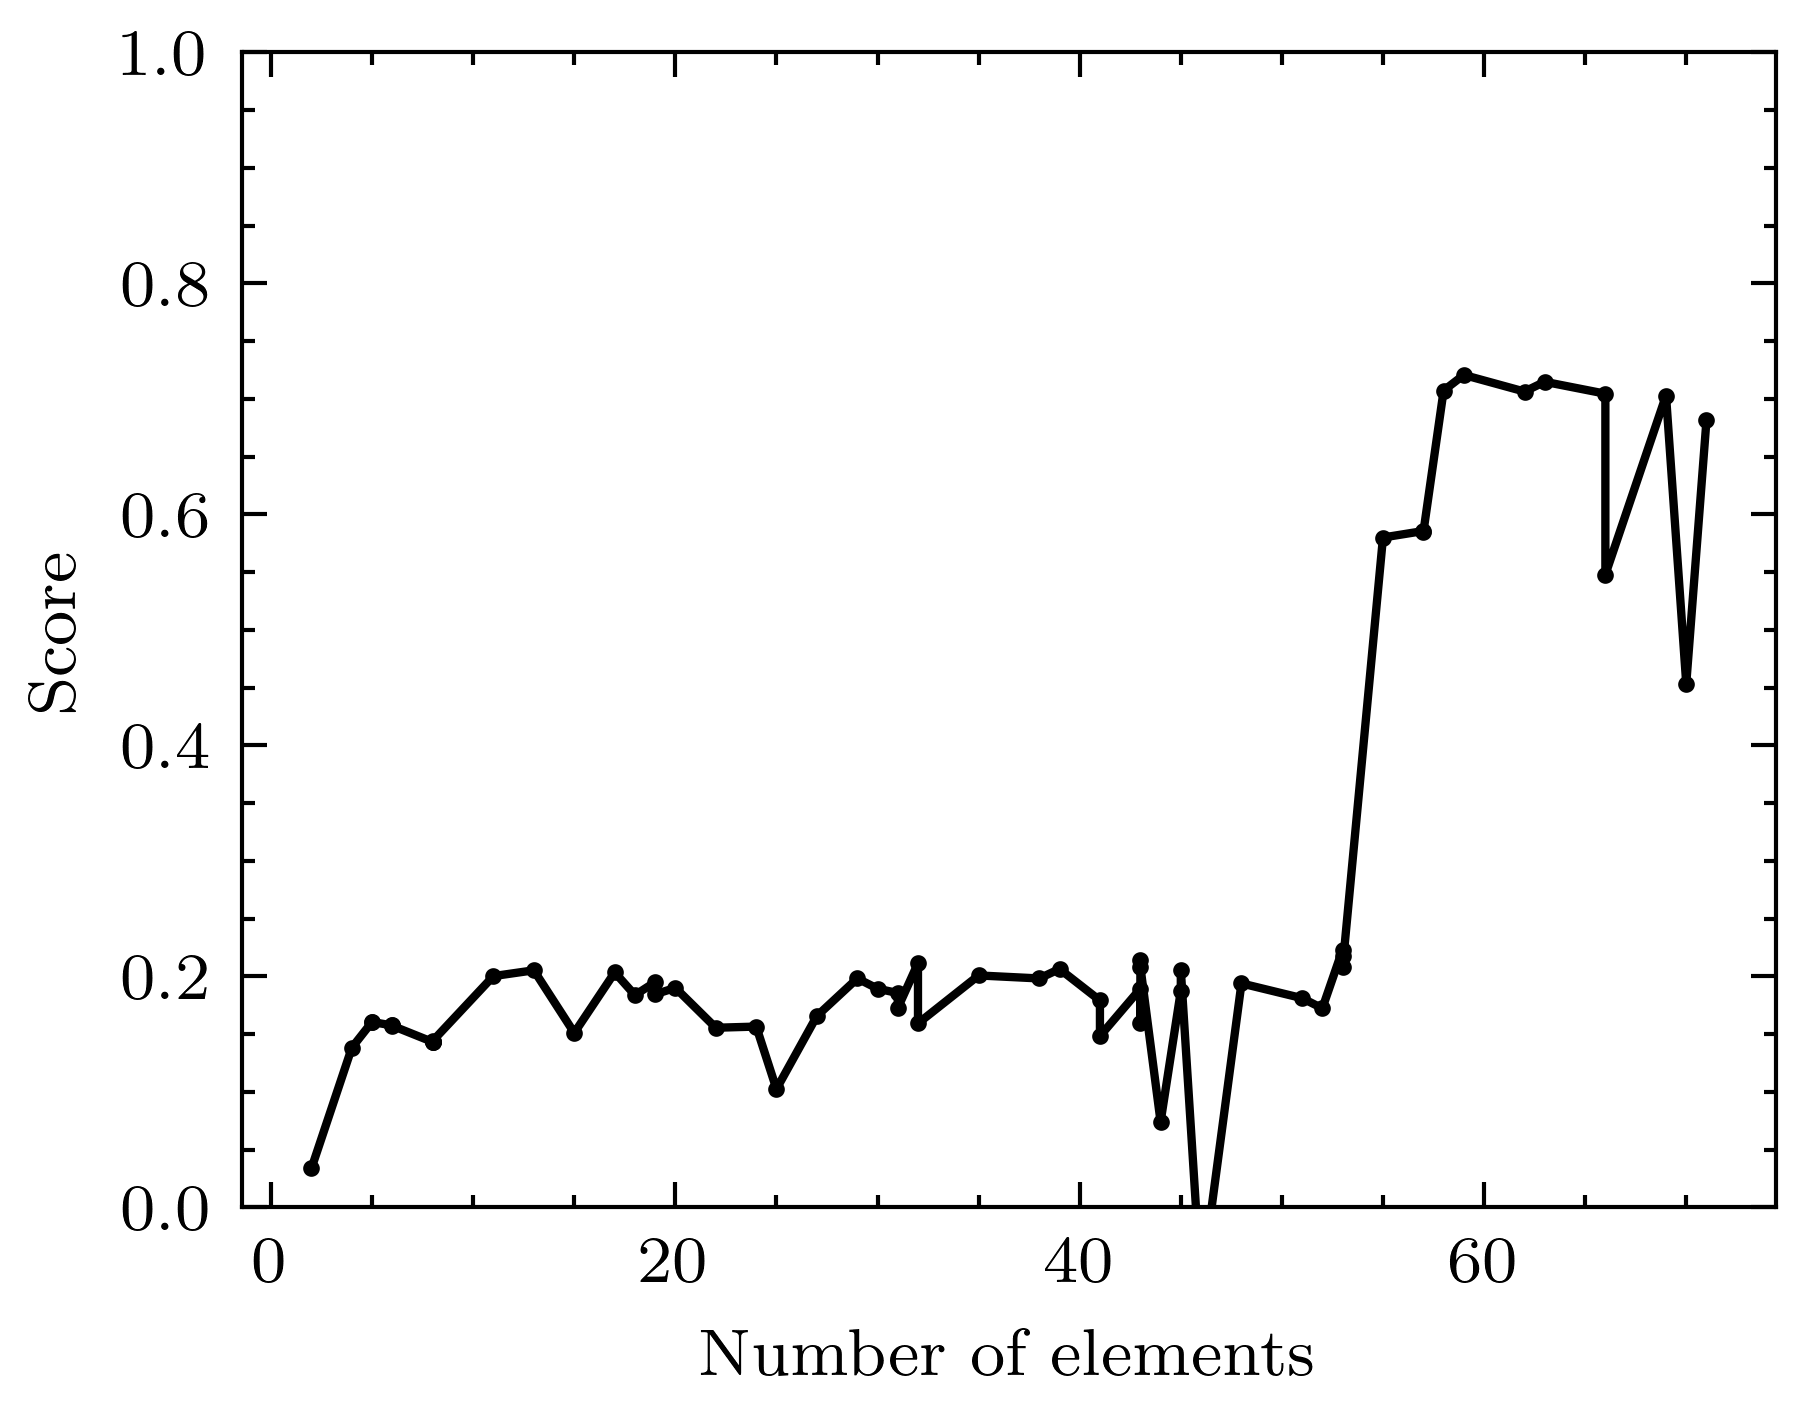

In [117]:
with plt.style.context(['science', 'ieee']):
    plt.plot(treshold_variance_stats['n_features'], treshold_variance_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

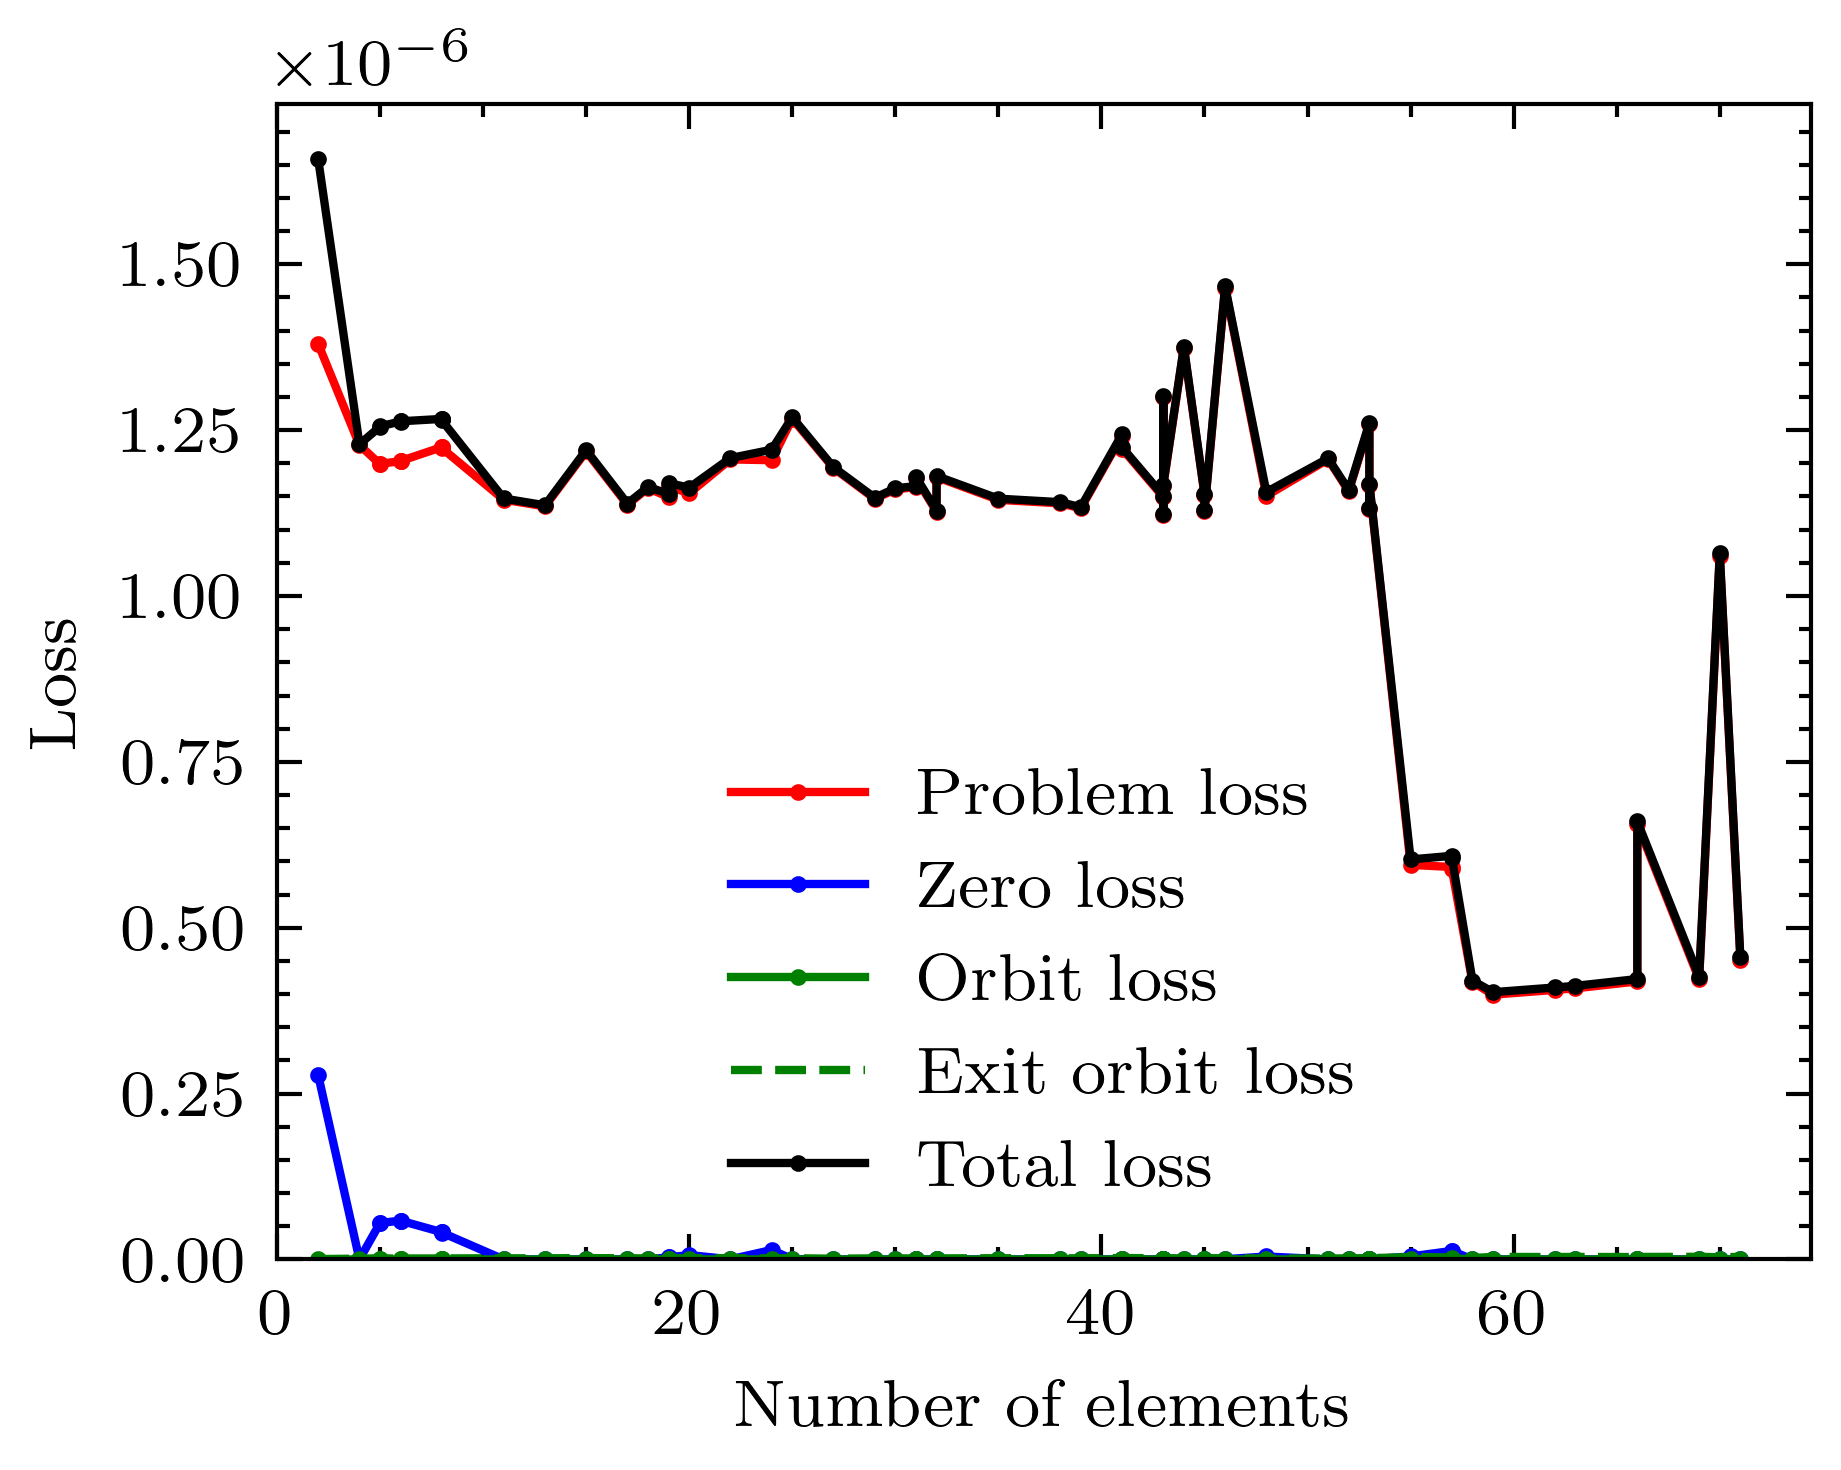

In [59]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y2**

In [118]:
FOLDER = "Y2_threshold_variance"

tmp = gather_data3(FOLDER)
treshold_variance_stats = tmp.sort_values(by = ['n_features'])
treshold_variance_stats['problem_loss'] = treshold_variance_stats.total_loss - treshold_variance_stats.orbit_loss - treshold_variance_stats.zero_loss - treshold_variance_stats.exit_orbit_loss

print(treshold_variance_stats)

Found 59 files.
         Regularization         alpha  n_features  \
22  regularizer_mod_5_4  5.000000e-07           2   
18  regularizer_mod_5_4  5.000000e-07           4   
5   regularizer_mod_5_4  5.000000e-07           5   
40  regularizer_mod_5_4  5.000000e-07           5   
12  regularizer_mod_5_4  5.000000e-07           6   
35  regularizer_mod_5_4  5.000000e-07           6   
44  regularizer_mod_5_4  5.000000e-07           6   
2   regularizer_mod_5_4  5.000000e-07           8   
54  regularizer_mod_5_4  5.000000e-07           8   
13  regularizer_mod_5_4  5.000000e-07           8   
43  regularizer_mod_5_4  5.000000e-07           8   
46  regularizer_mod_5_4  5.000000e-07          11   
24  regularizer_mod_5_4  5.000000e-07          13   
56  regularizer_mod_5_4  5.000000e-07          15   
4   regularizer_mod_5_4  5.000000e-07          17   
47  regularizer_mod_5_4  5.000000e-07          18   
37  regularizer_mod_5_4  5.000000e-07          19   
36  regularizer_mod_5_4  5.000

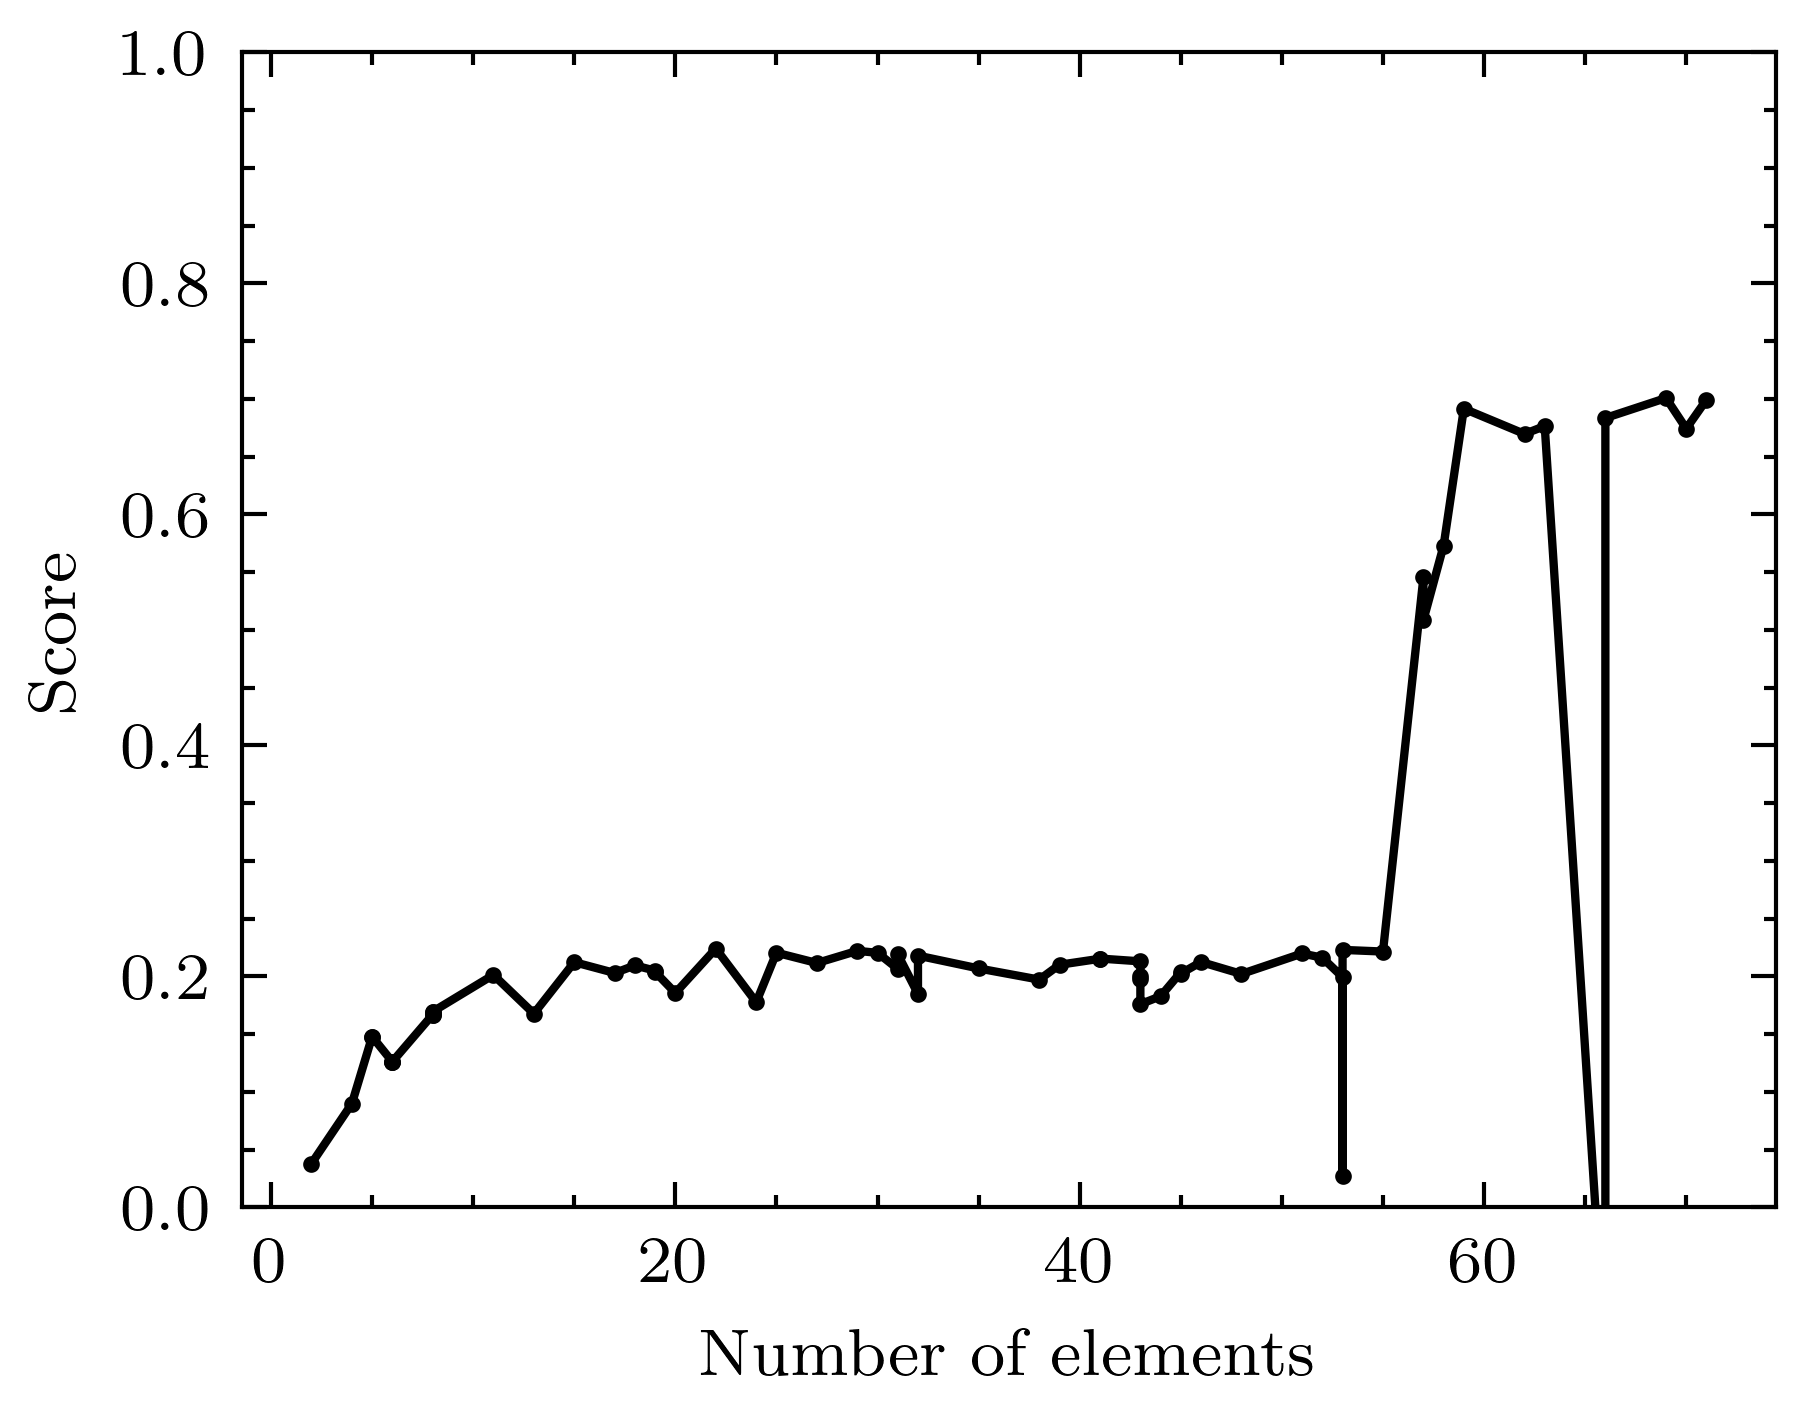

In [85]:
with plt.style.context(['science', 'ieee']):
    plt.plot(treshold_variance_stats['n_features'], treshold_variance_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

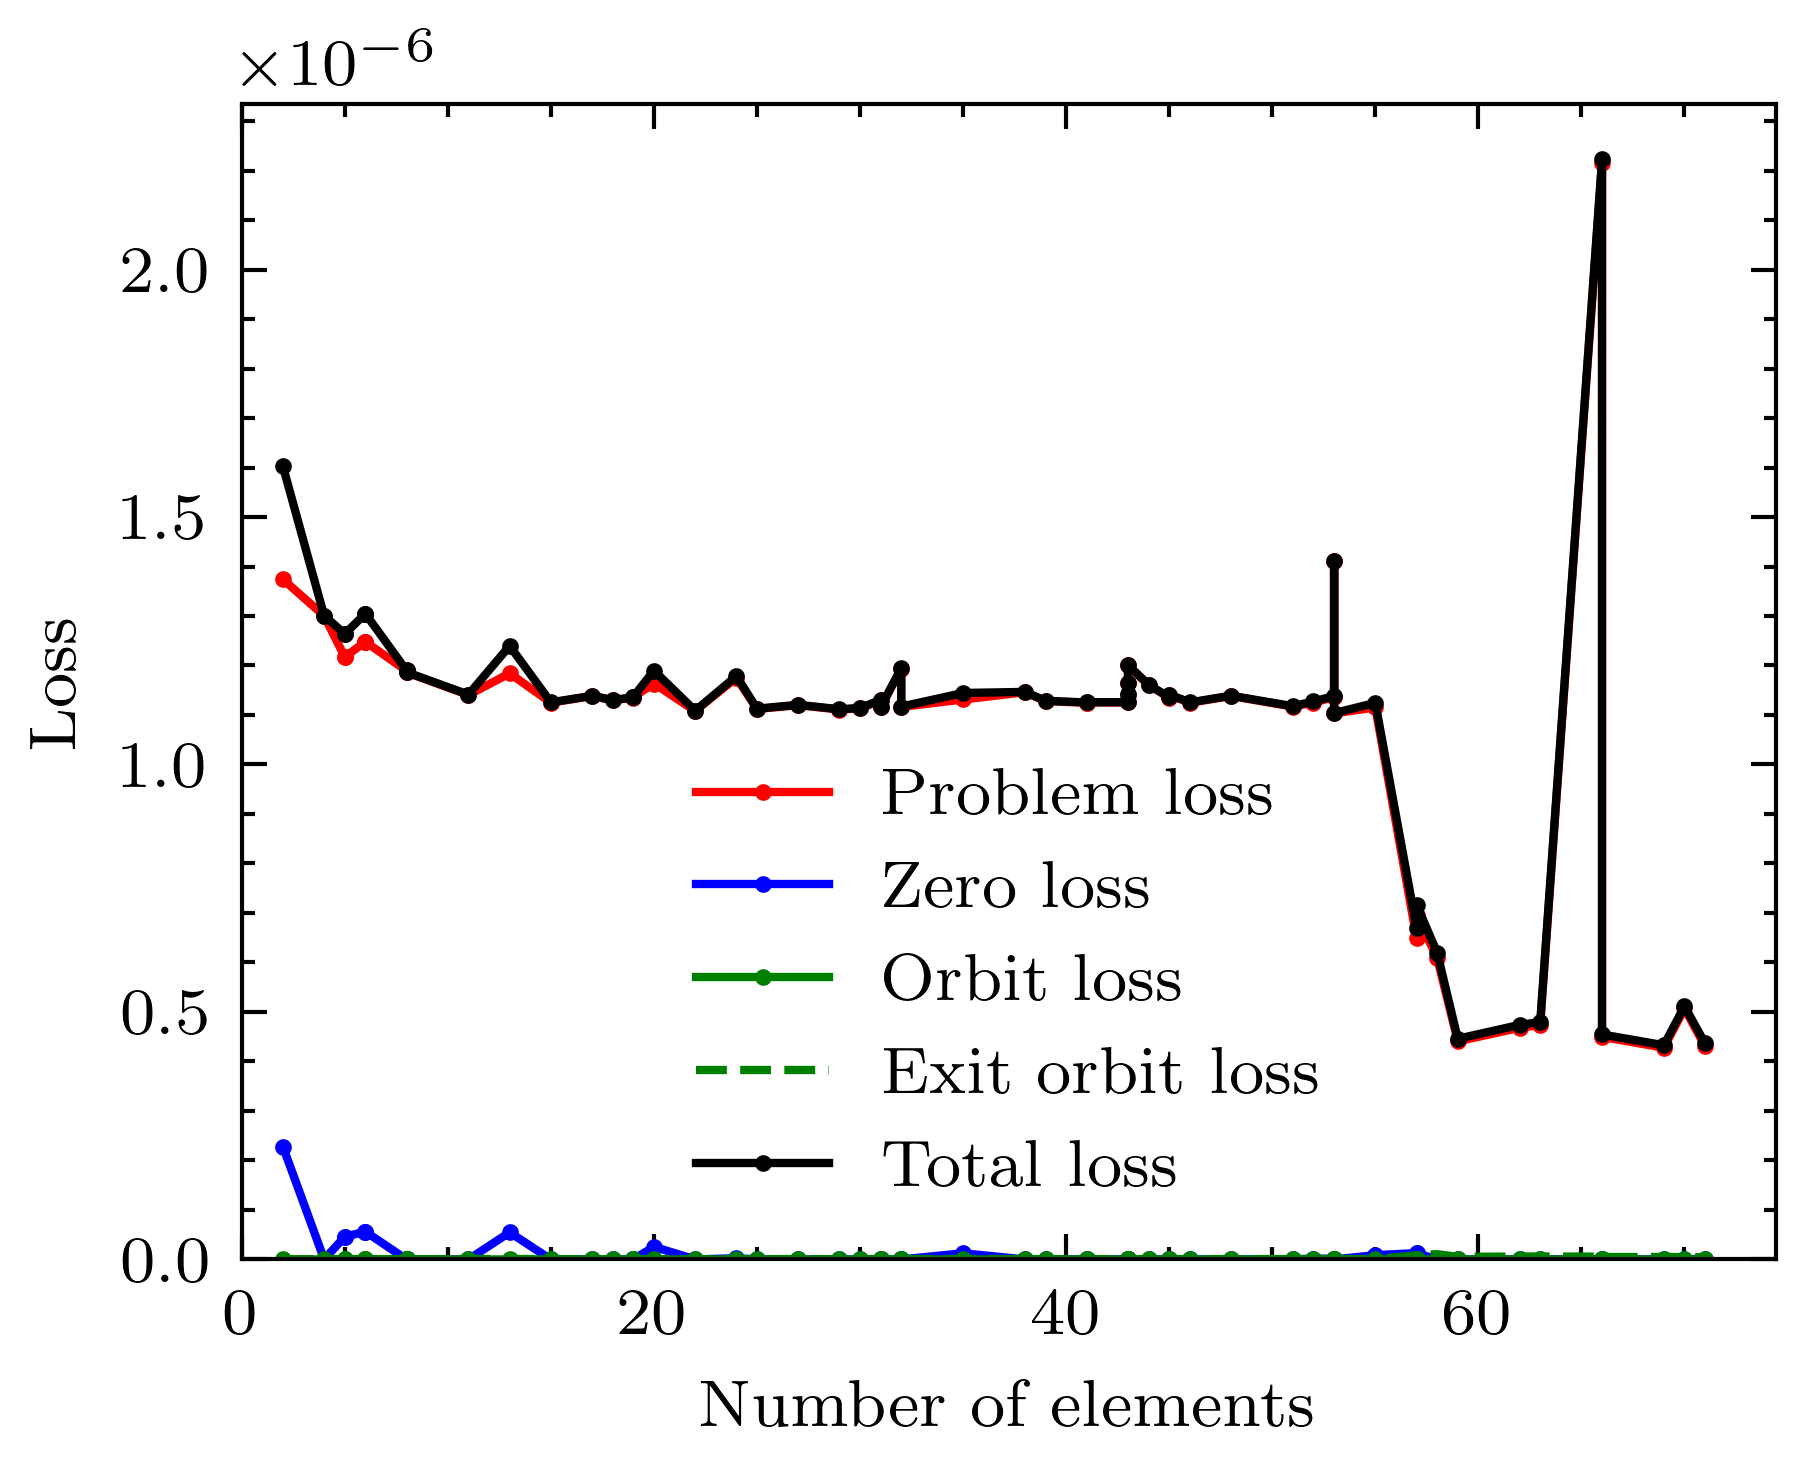

In [86]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y3**

In [119]:
FOLDER = "Y3_threshold_variance"

tmp = gather_data3(FOLDER)
treshold_variance_stats = tmp.sort_values(by = ['n_features'])
treshold_variance_stats['problem_loss'] = treshold_variance_stats.total_loss - treshold_variance_stats.orbit_loss - treshold_variance_stats.zero_loss - treshold_variance_stats.exit_orbit_loss

print(treshold_variance_stats)

Found 59 files.
         Regularization         alpha  n_features  \
5   regularizer_mod_5_4  5.000000e-07           2   
40  regularizer_mod_5_4  5.000000e-07           4   
25  regularizer_mod_5_4  5.000000e-07           5   
4   regularizer_mod_5_4  5.000000e-07           5   
35  regularizer_mod_5_4  5.000000e-07           6   
17  regularizer_mod_5_4  5.000000e-07           6   
45  regularizer_mod_5_4  5.000000e-07           6   
36  regularizer_mod_5_4  5.000000e-07           8   
16  regularizer_mod_5_4  5.000000e-07           8   
59  regularizer_mod_5_4  5.000000e-07           8   
54  regularizer_mod_5_4  5.000000e-07           8   
38  regularizer_mod_5_4  5.000000e-07          11   
52  regularizer_mod_5_4  5.000000e-07          13   
1   regularizer_mod_5_4  5.000000e-07          15   
55  regularizer_mod_5_4  5.000000e-07          17   
11  regularizer_mod_5_4  5.000000e-07          18   
21  regularizer_mod_5_4  5.000000e-07          19   
51  regularizer_mod_5_4  5.000

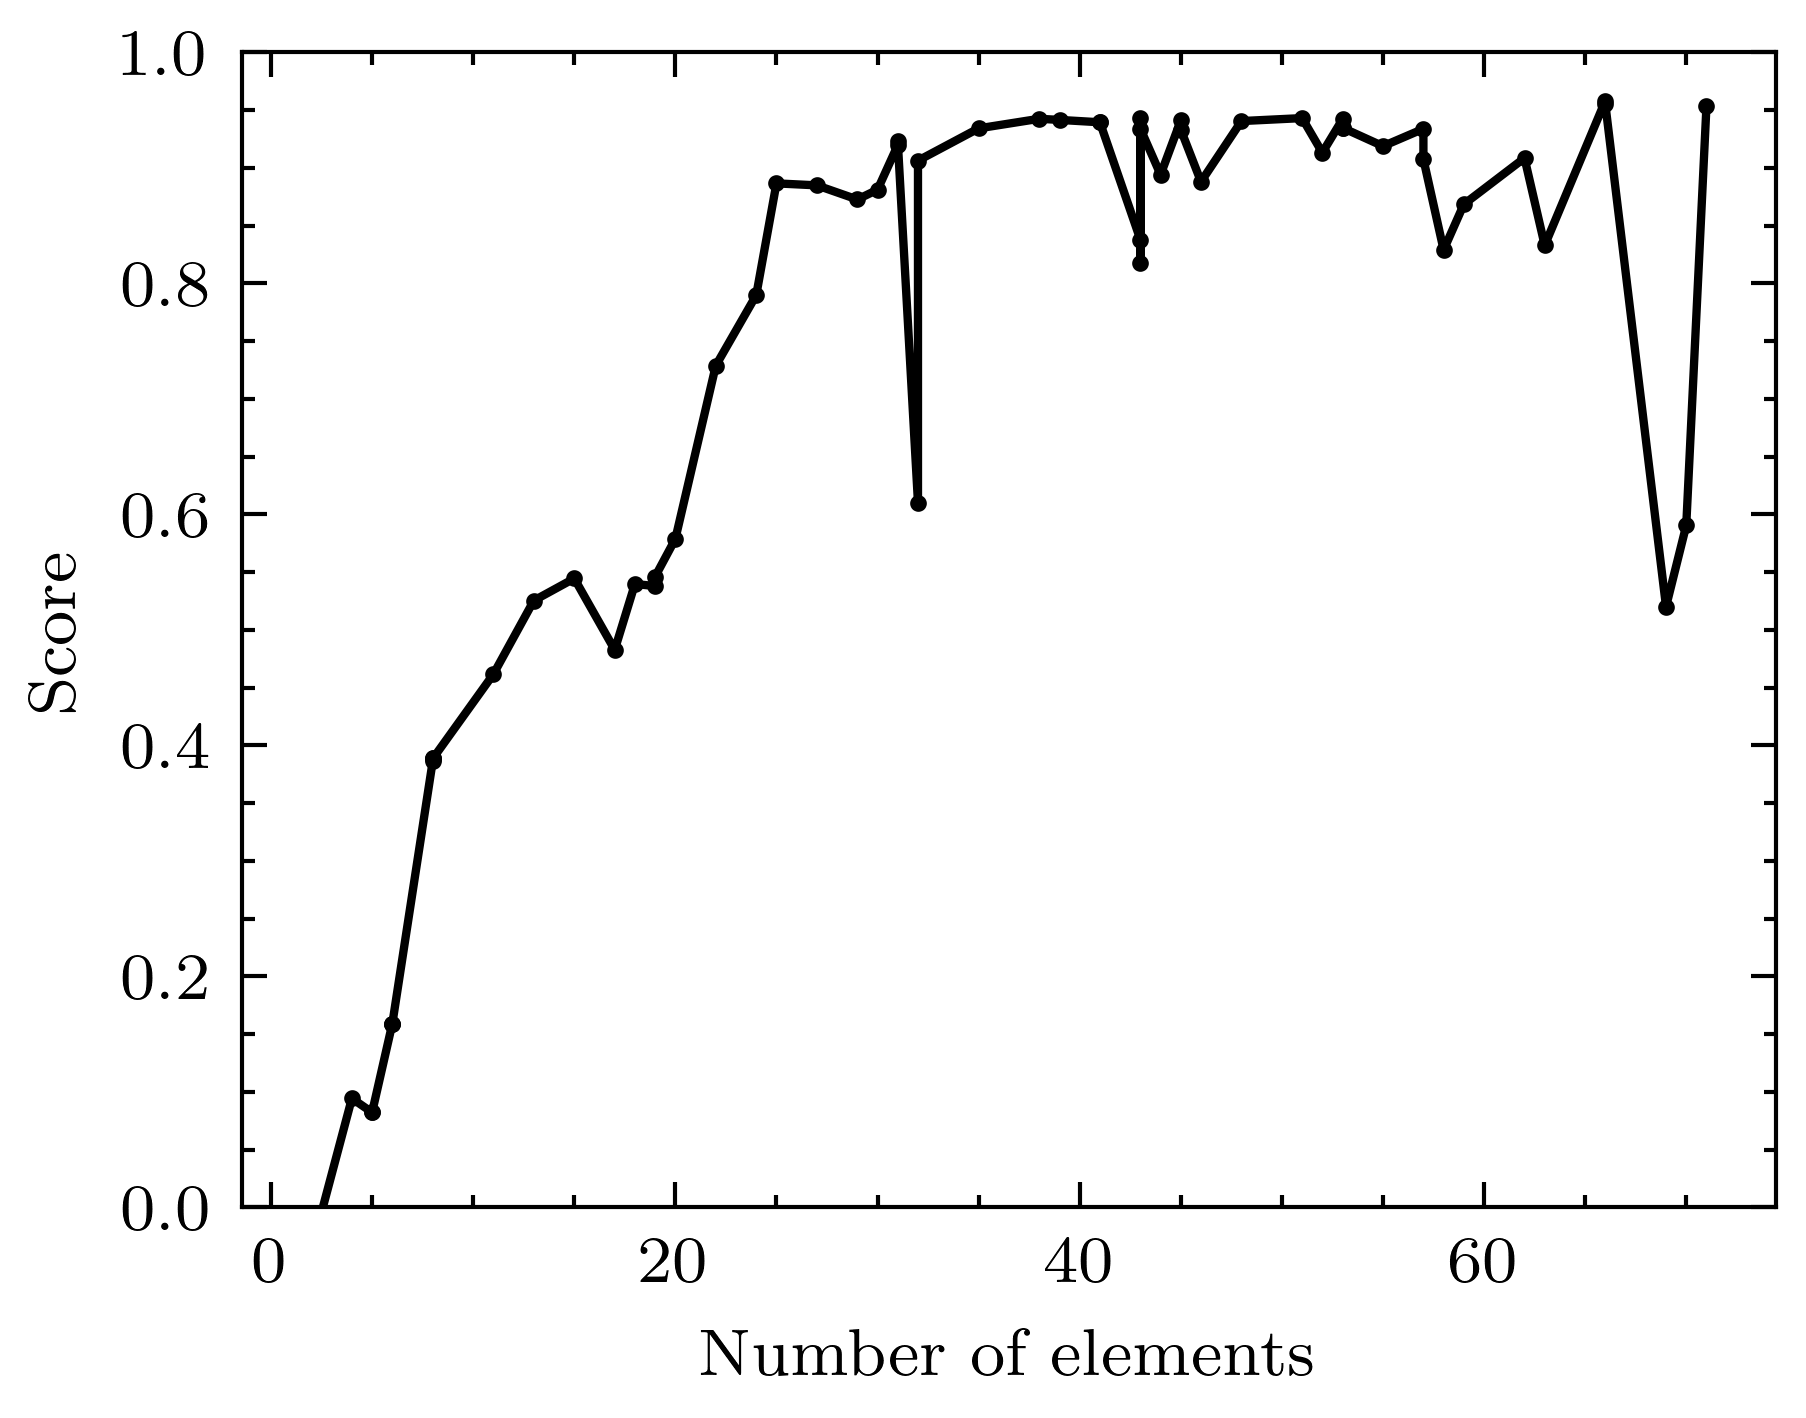

In [120]:
with plt.style.context(['science', 'ieee']):
    plt.plot(treshold_variance_stats['n_features'], treshold_variance_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

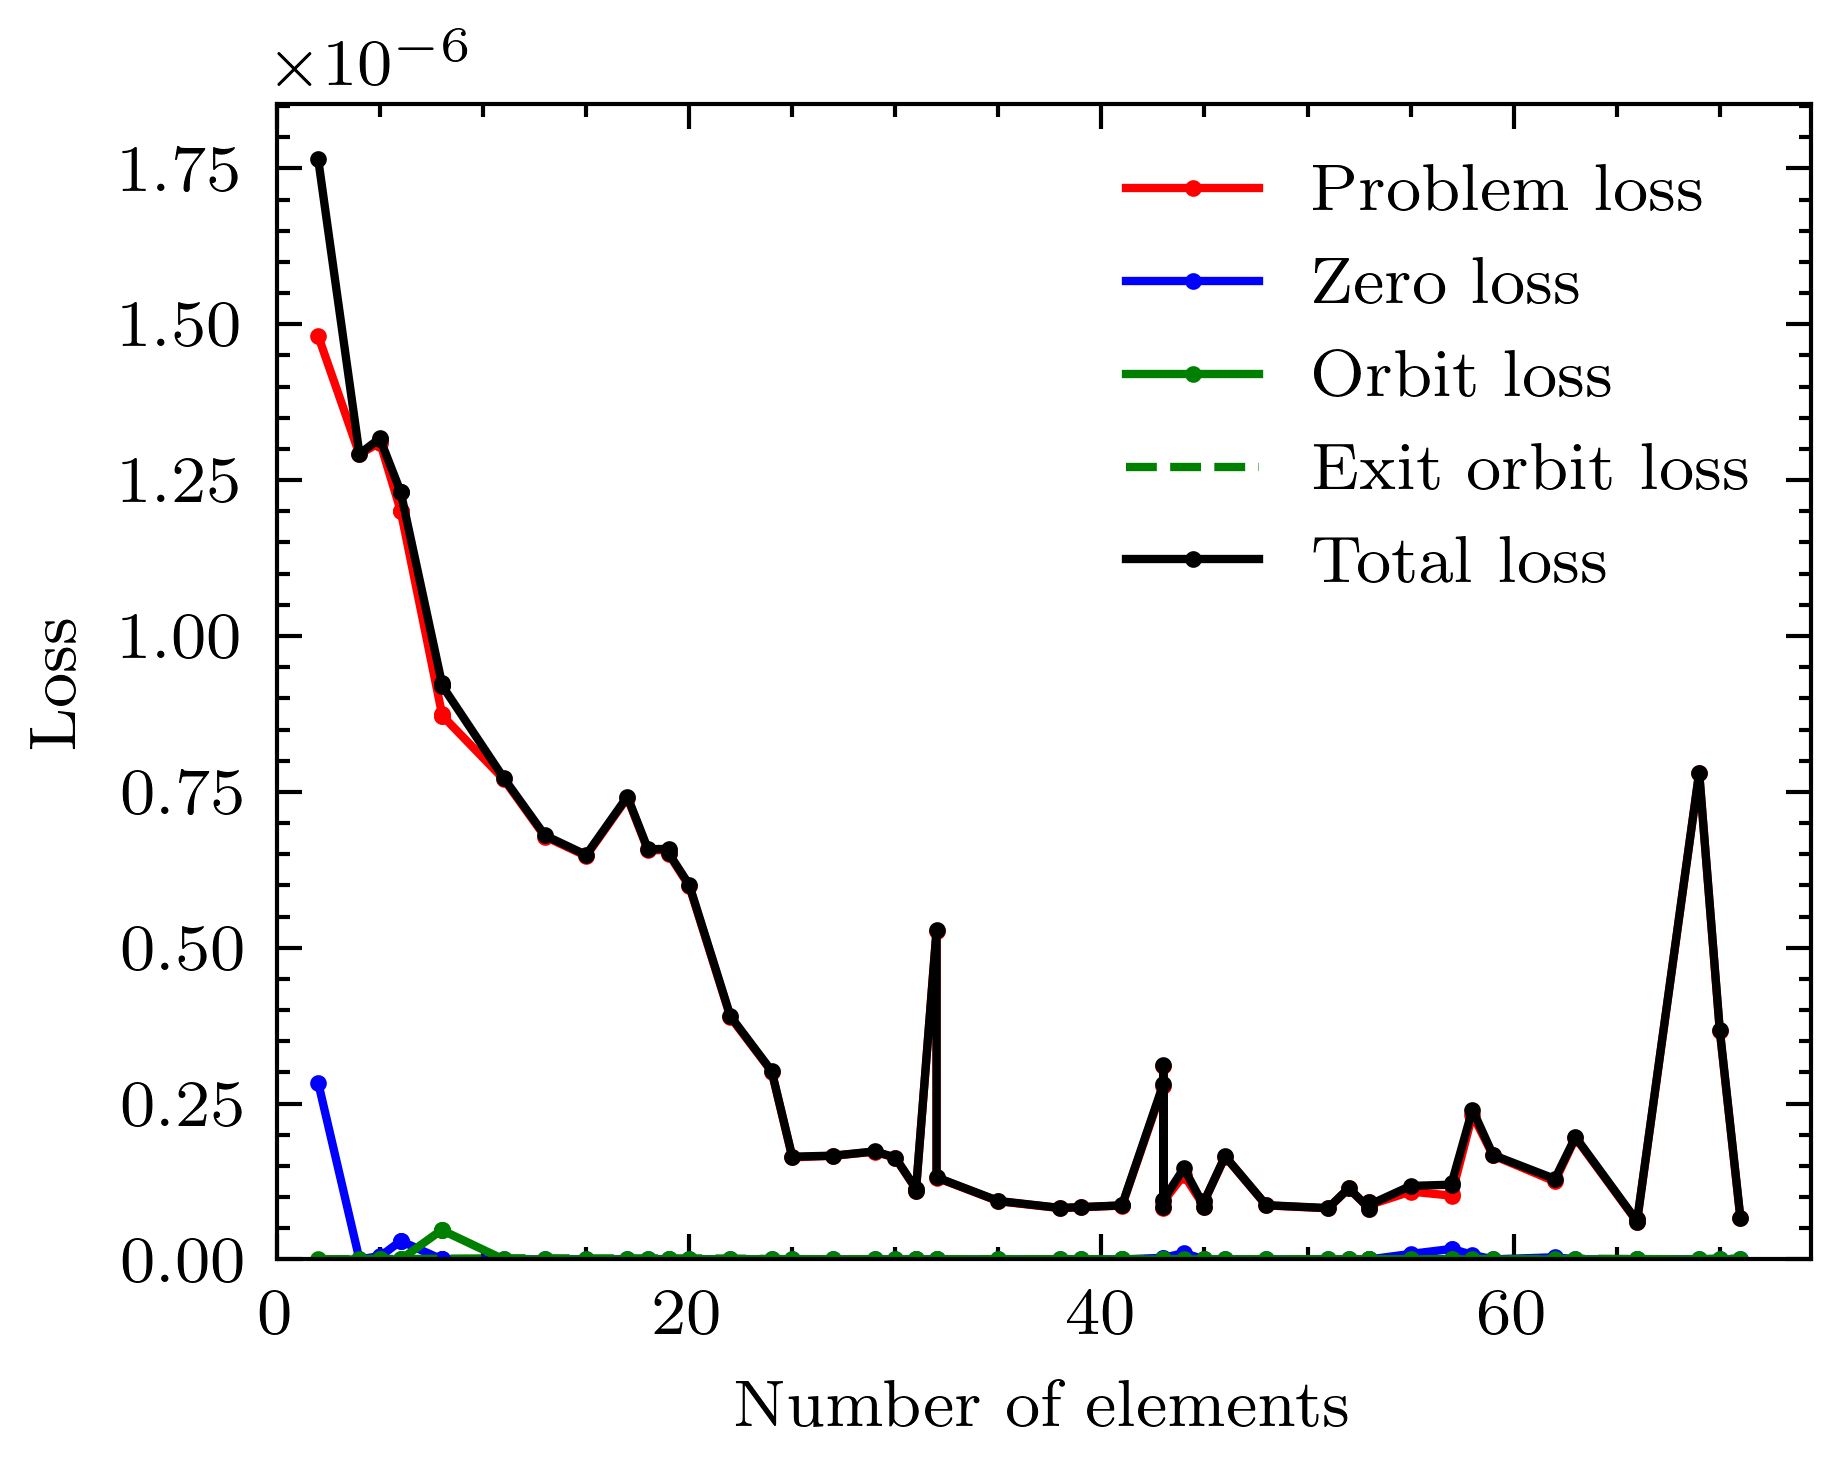

In [121]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y4**

In [147]:
FOLDER = "Y4_threshold_variance"

tmp = gather_data3(FOLDER)
treshold_variance_stats = tmp.sort_values(by = ['n_features'])
treshold_variance_stats['problem_loss'] = treshold_variance_stats.total_loss - treshold_variance_stats.orbit_loss - treshold_variance_stats.zero_loss - treshold_variance_stats.exit_orbit_loss

print(treshold_variance_stats)

Found 60 files.
         Regularization         alpha  n_features  \
44  regularizer_mod_5_4  5.000000e-07           2   
46  regularizer_mod_5_4  5.000000e-07           4   
28  regularizer_mod_5_4  5.000000e-07           5   
25  regularizer_mod_5_4  5.000000e-07           5   
10  regularizer_mod_5_4  5.000000e-07           6   
26  regularizer_mod_5_4  5.000000e-07           6   
24  regularizer_mod_5_4  5.000000e-07           6   
43  regularizer_mod_5_4  5.000000e-07           8   
58  regularizer_mod_5_4  5.000000e-07           8   
27  regularizer_mod_5_4  5.000000e-07           8   
6   regularizer_mod_5_4  5.000000e-07           8   
52  regularizer_mod_5_4  5.000000e-07          11   
55  regularizer_mod_5_4  5.000000e-07          13   
49  regularizer_mod_5_4  5.000000e-07          15   
3   regularizer_mod_5_4  5.000000e-07          17   
19  regularizer_mod_5_4  5.000000e-07          18   
30  regularizer_mod_5_4  5.000000e-07          19   
1   regularizer_mod_5_4  5.000

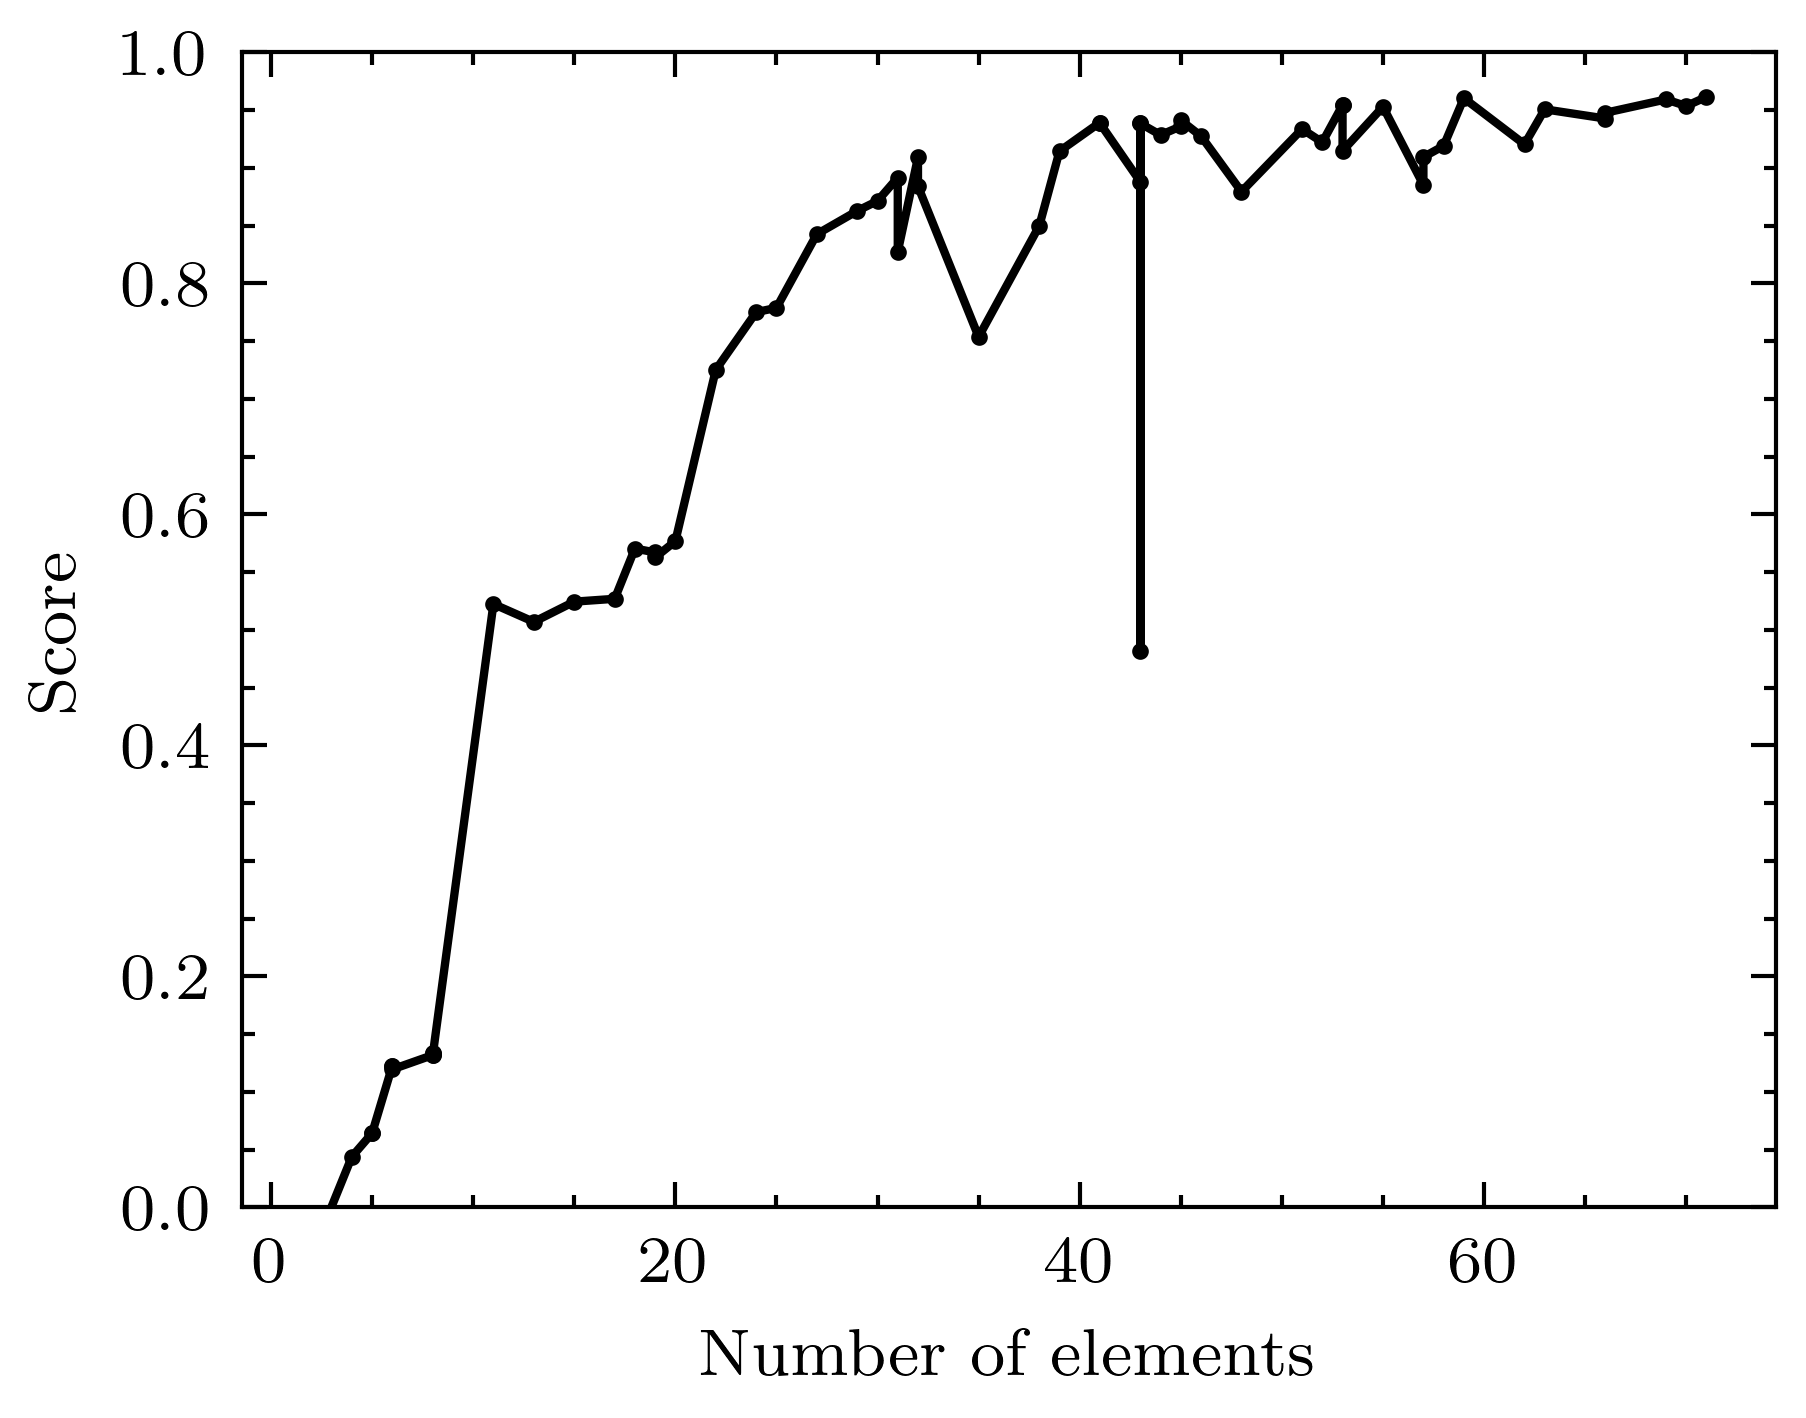

In [148]:
with plt.style.context(['science', 'ieee']):
    plt.plot(treshold_variance_stats['n_features'], treshold_variance_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

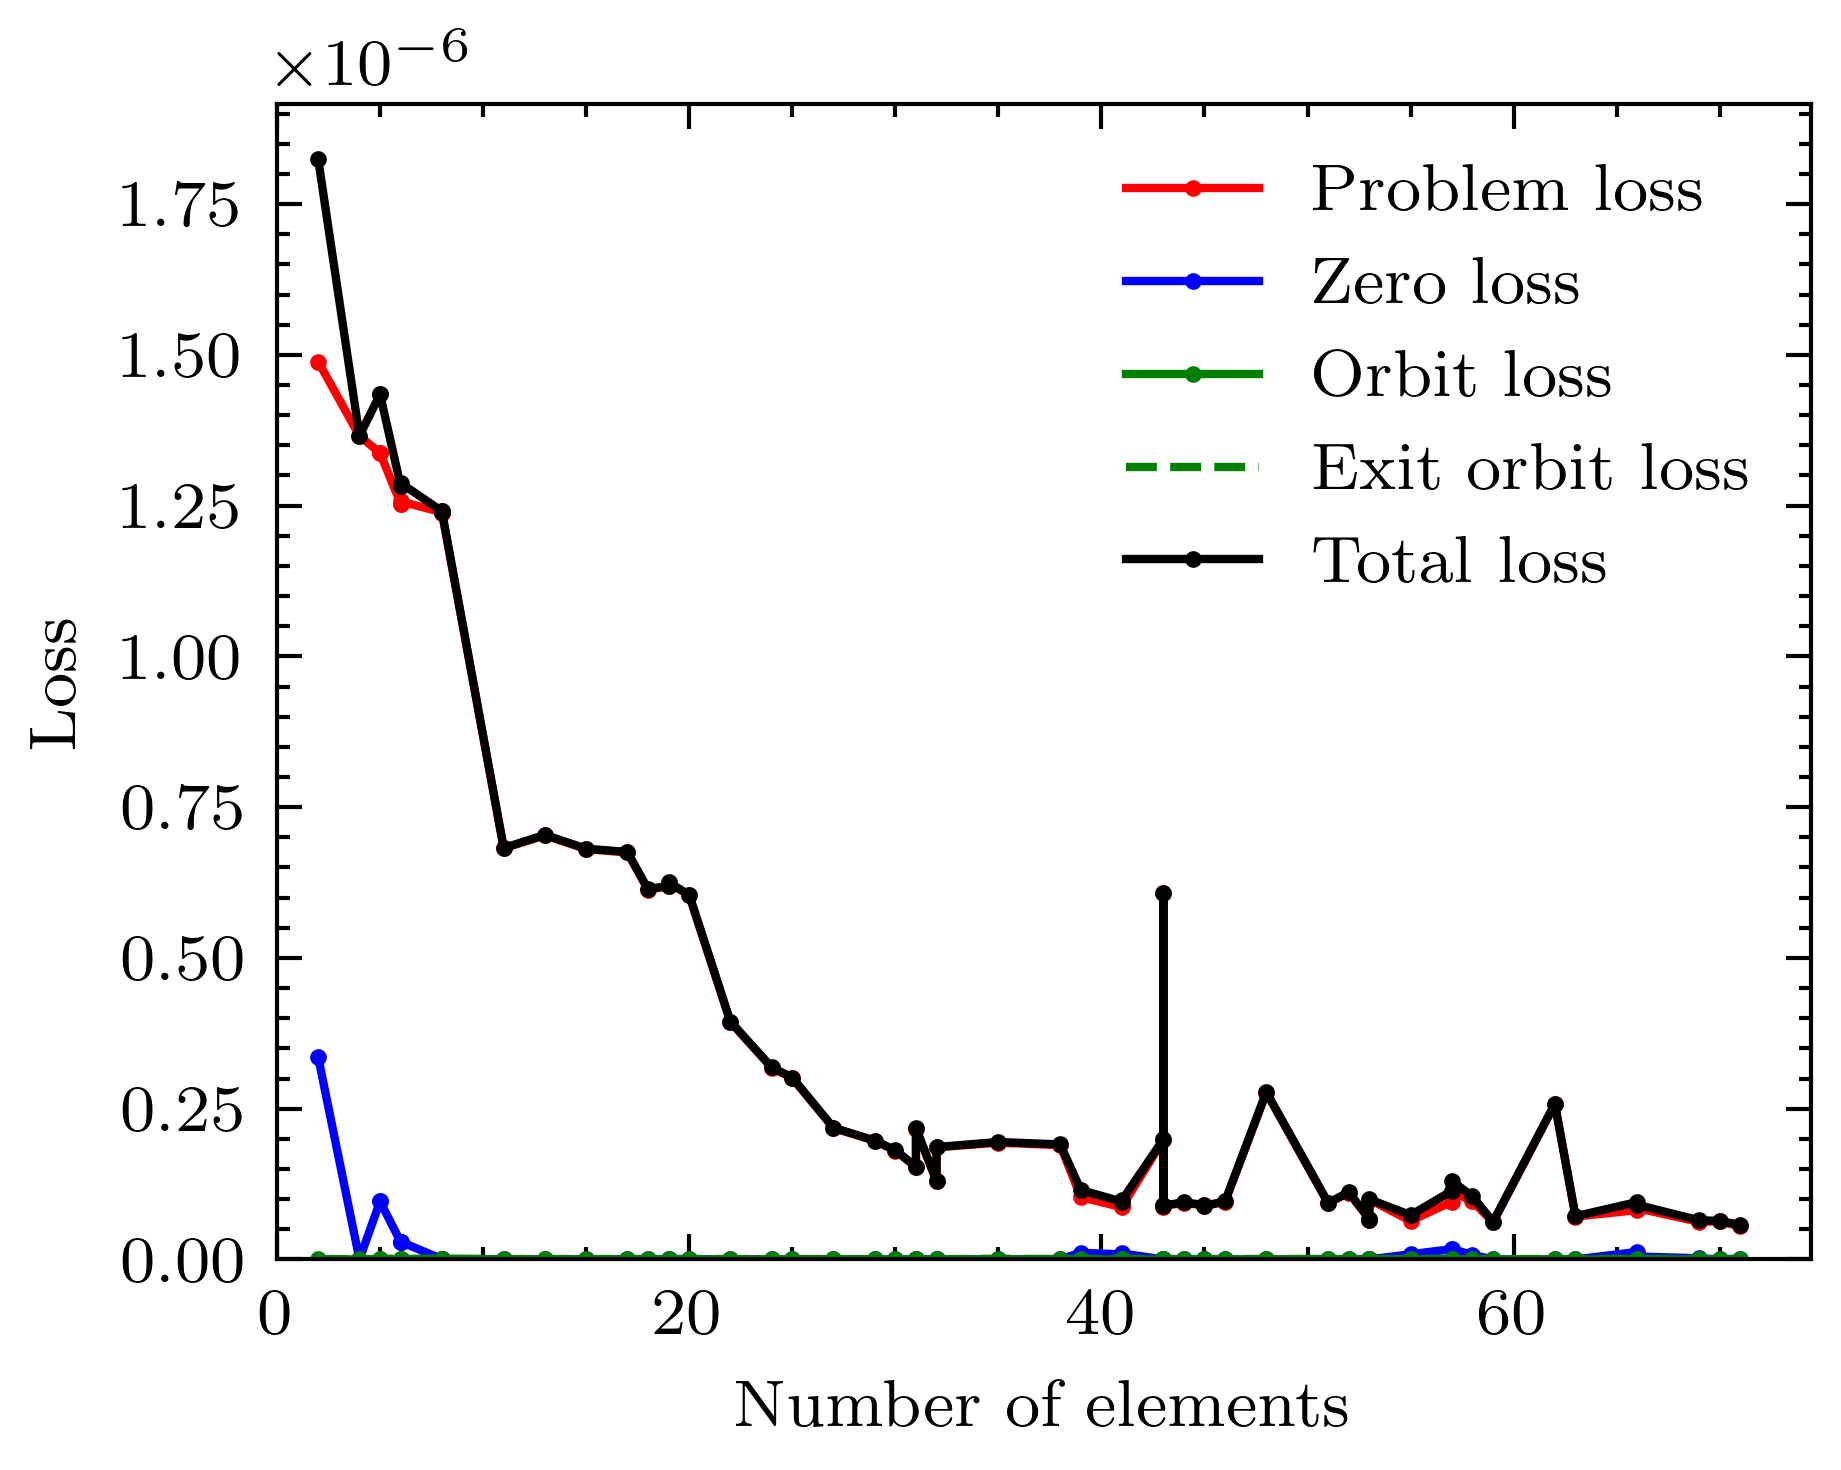

In [149]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y5**

In [199]:
FOLDER = "Y5_threshold_variance"

tmp = gather_data3(FOLDER)
treshold_variance_stats = tmp.sort_values(by = ['n_features'])
treshold_variance_stats['problem_loss'] = treshold_variance_stats.total_loss - treshold_variance_stats.orbit_loss - treshold_variance_stats.zero_loss - treshold_variance_stats.exit_orbit_loss

print(treshold_variance_stats)

Found 50 files.
         Regularization         alpha  n_features  \
40  regularizer_mod_5_4  5.000000e-07           2   
26  regularizer_mod_5_4  5.000000e-07           4   
5   regularizer_mod_5_4  5.000000e-07           5   
10  regularizer_mod_5_4  5.000000e-07           5   
36  regularizer_mod_5_4  5.000000e-07           6   
16  regularizer_mod_5_4  5.000000e-07           6   
37  regularizer_mod_5_4  5.000000e-07           6   
33  regularizer_mod_5_4  5.000000e-07           8   
24  regularizer_mod_5_4  5.000000e-07           8   
8   regularizer_mod_5_4  5.000000e-07           8   
21  regularizer_mod_5_4  5.000000e-07           8   
6   regularizer_mod_5_4  5.000000e-07          11   
32  regularizer_mod_5_4  5.000000e-07          13   
23  regularizer_mod_5_4  5.000000e-07          15   
27  regularizer_mod_5_4  5.000000e-07          17   
7   regularizer_mod_5_4  5.000000e-07          18   
13  regularizer_mod_5_4  5.000000e-07          19   
41  regularizer_mod_5_4  5.000

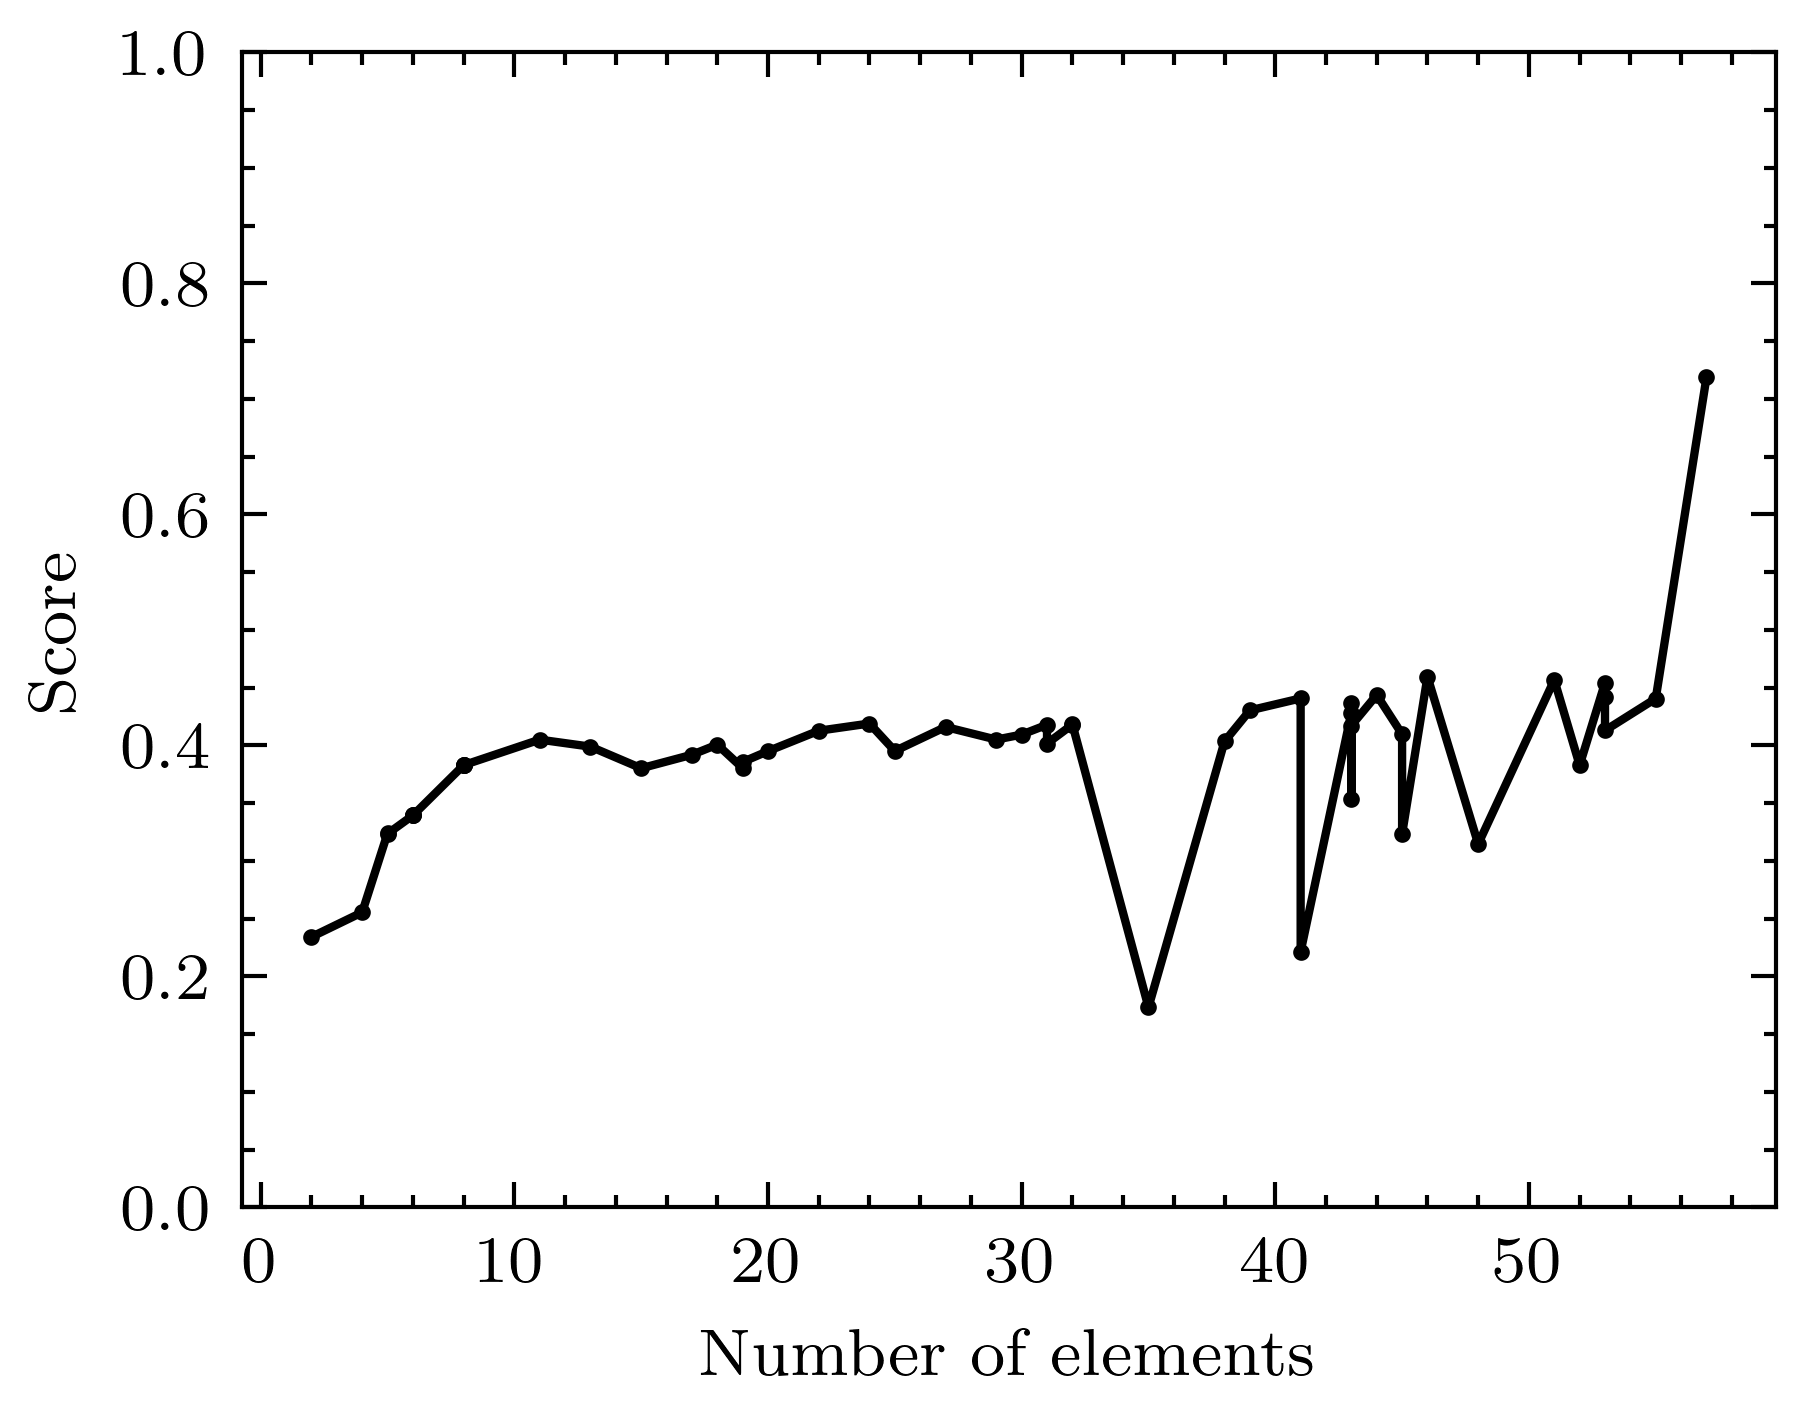

In [200]:
with plt.style.context(['science', 'ieee']):
    plt.plot(treshold_variance_stats['n_features'], treshold_variance_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

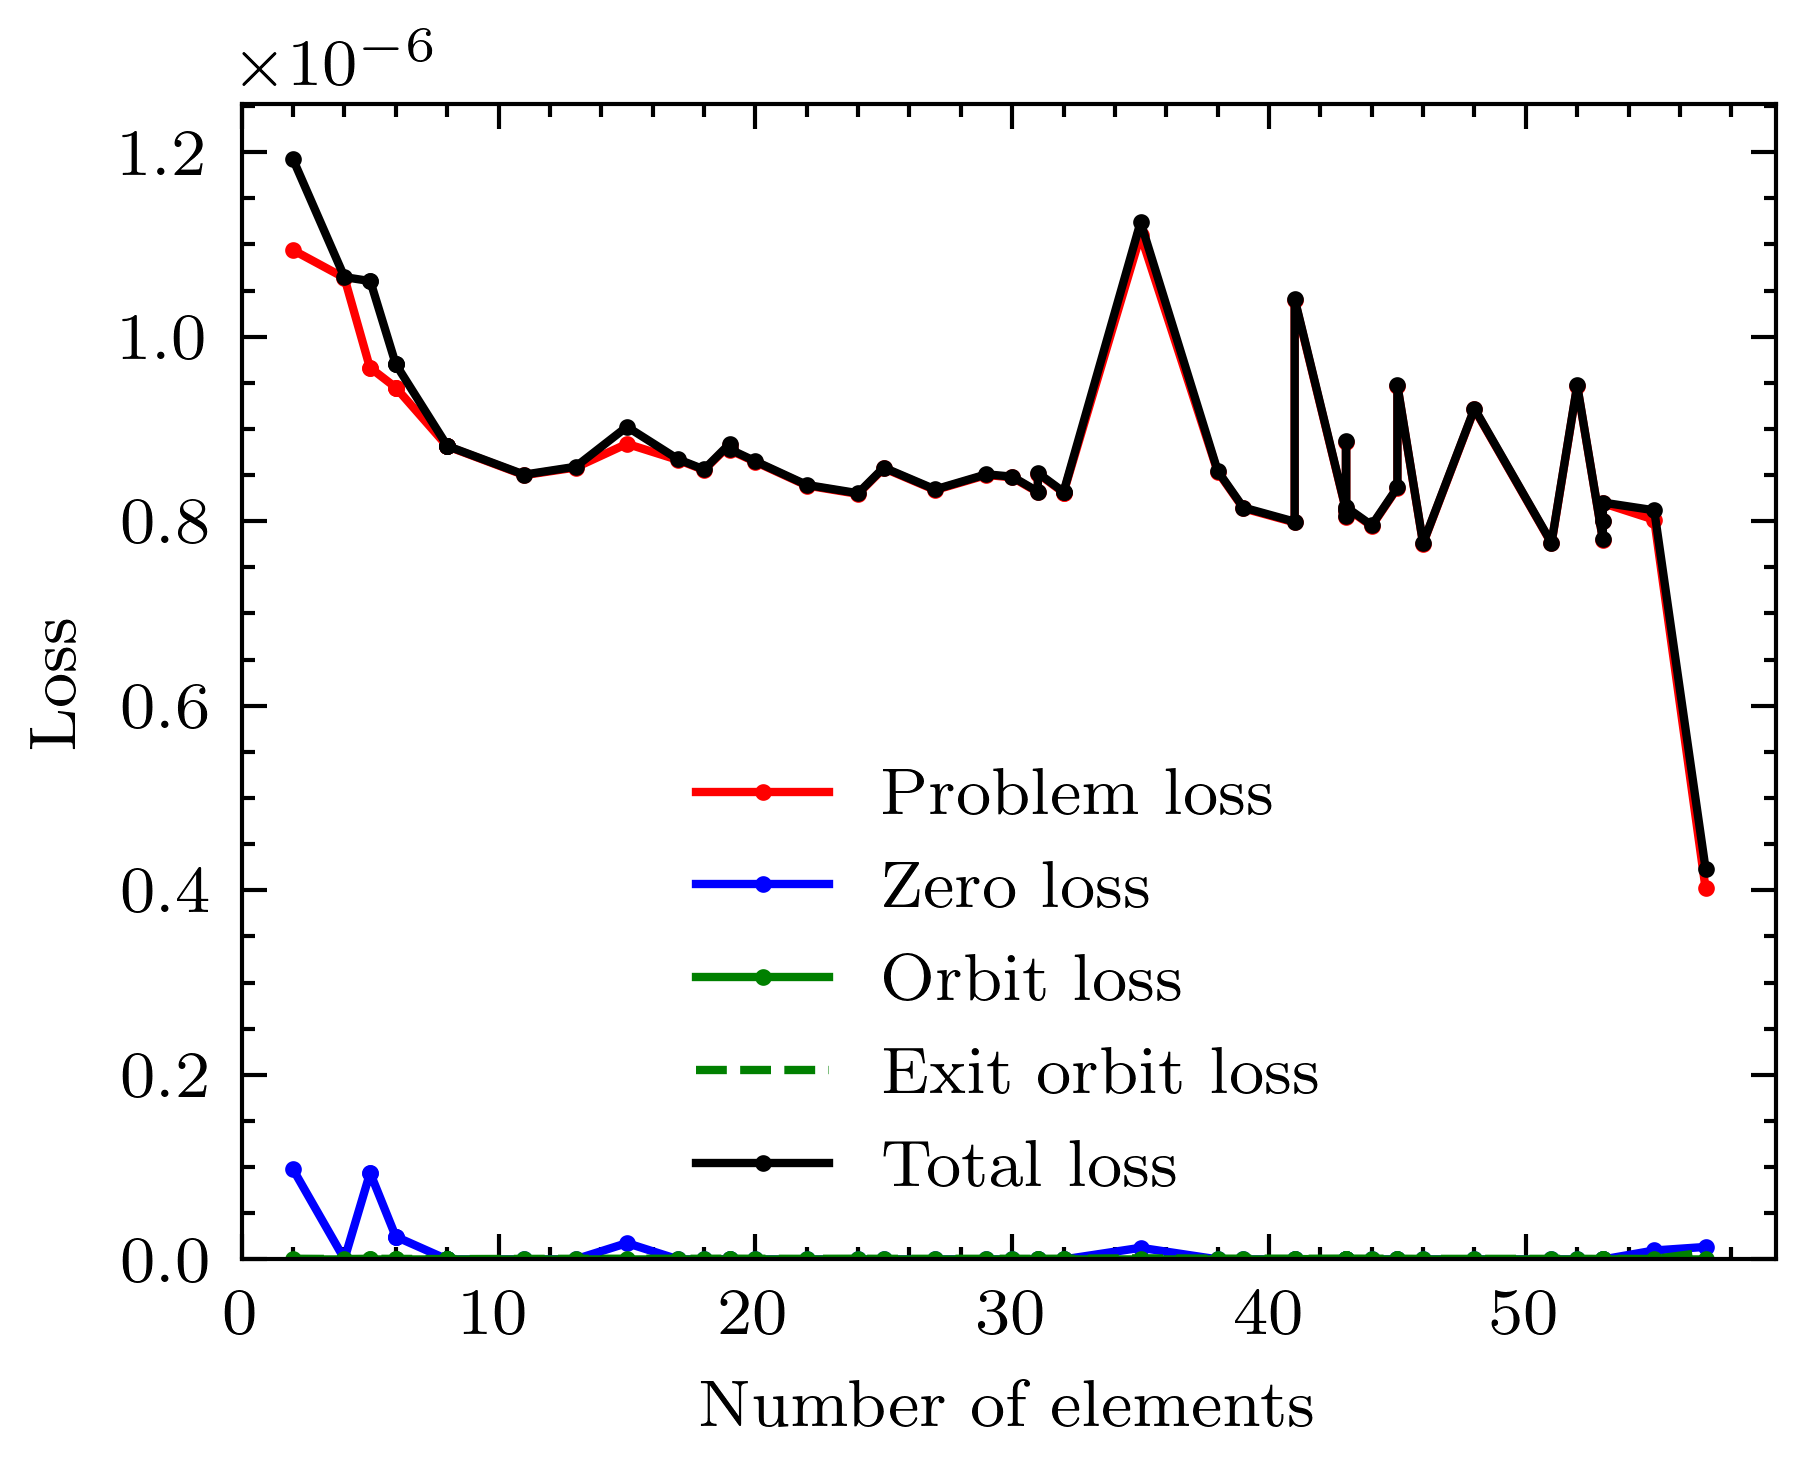

In [201]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y6**

In [202]:
FOLDER = "Y6_threshold_variance"

tmp = gather_data3(FOLDER)
treshold_variance_stats = tmp.sort_values(by = ['n_features'])
treshold_variance_stats['problem_loss'] = treshold_variance_stats.total_loss - treshold_variance_stats.orbit_loss - treshold_variance_stats.zero_loss - treshold_variance_stats.exit_orbit_loss

print(treshold_variance_stats)

Found 60 files.
         Regularization         alpha  n_features  \
18  regularizer_mod_5_4  5.000000e-07           2   
42  regularizer_mod_5_4  5.000000e-07           4   
41  regularizer_mod_5_4  5.000000e-07           5   
40  regularizer_mod_5_4  5.000000e-07           5   
26  regularizer_mod_5_4  5.000000e-07           6   
27  regularizer_mod_5_4  5.000000e-07           6   
16  regularizer_mod_5_4  5.000000e-07           6   
38  regularizer_mod_5_4  5.000000e-07           8   
57  regularizer_mod_5_4  5.000000e-07           8   
28  regularizer_mod_5_4  5.000000e-07           8   
32  regularizer_mod_5_4  5.000000e-07           8   
6   regularizer_mod_5_4  5.000000e-07          11   
4   regularizer_mod_5_4  5.000000e-07          13   
0   regularizer_mod_5_4  5.000000e-07          15   
58  regularizer_mod_5_4  5.000000e-07          17   
34  regularizer_mod_5_4  5.000000e-07          18   
25  regularizer_mod_5_4  5.000000e-07          19   
37  regularizer_mod_5_4  5.000

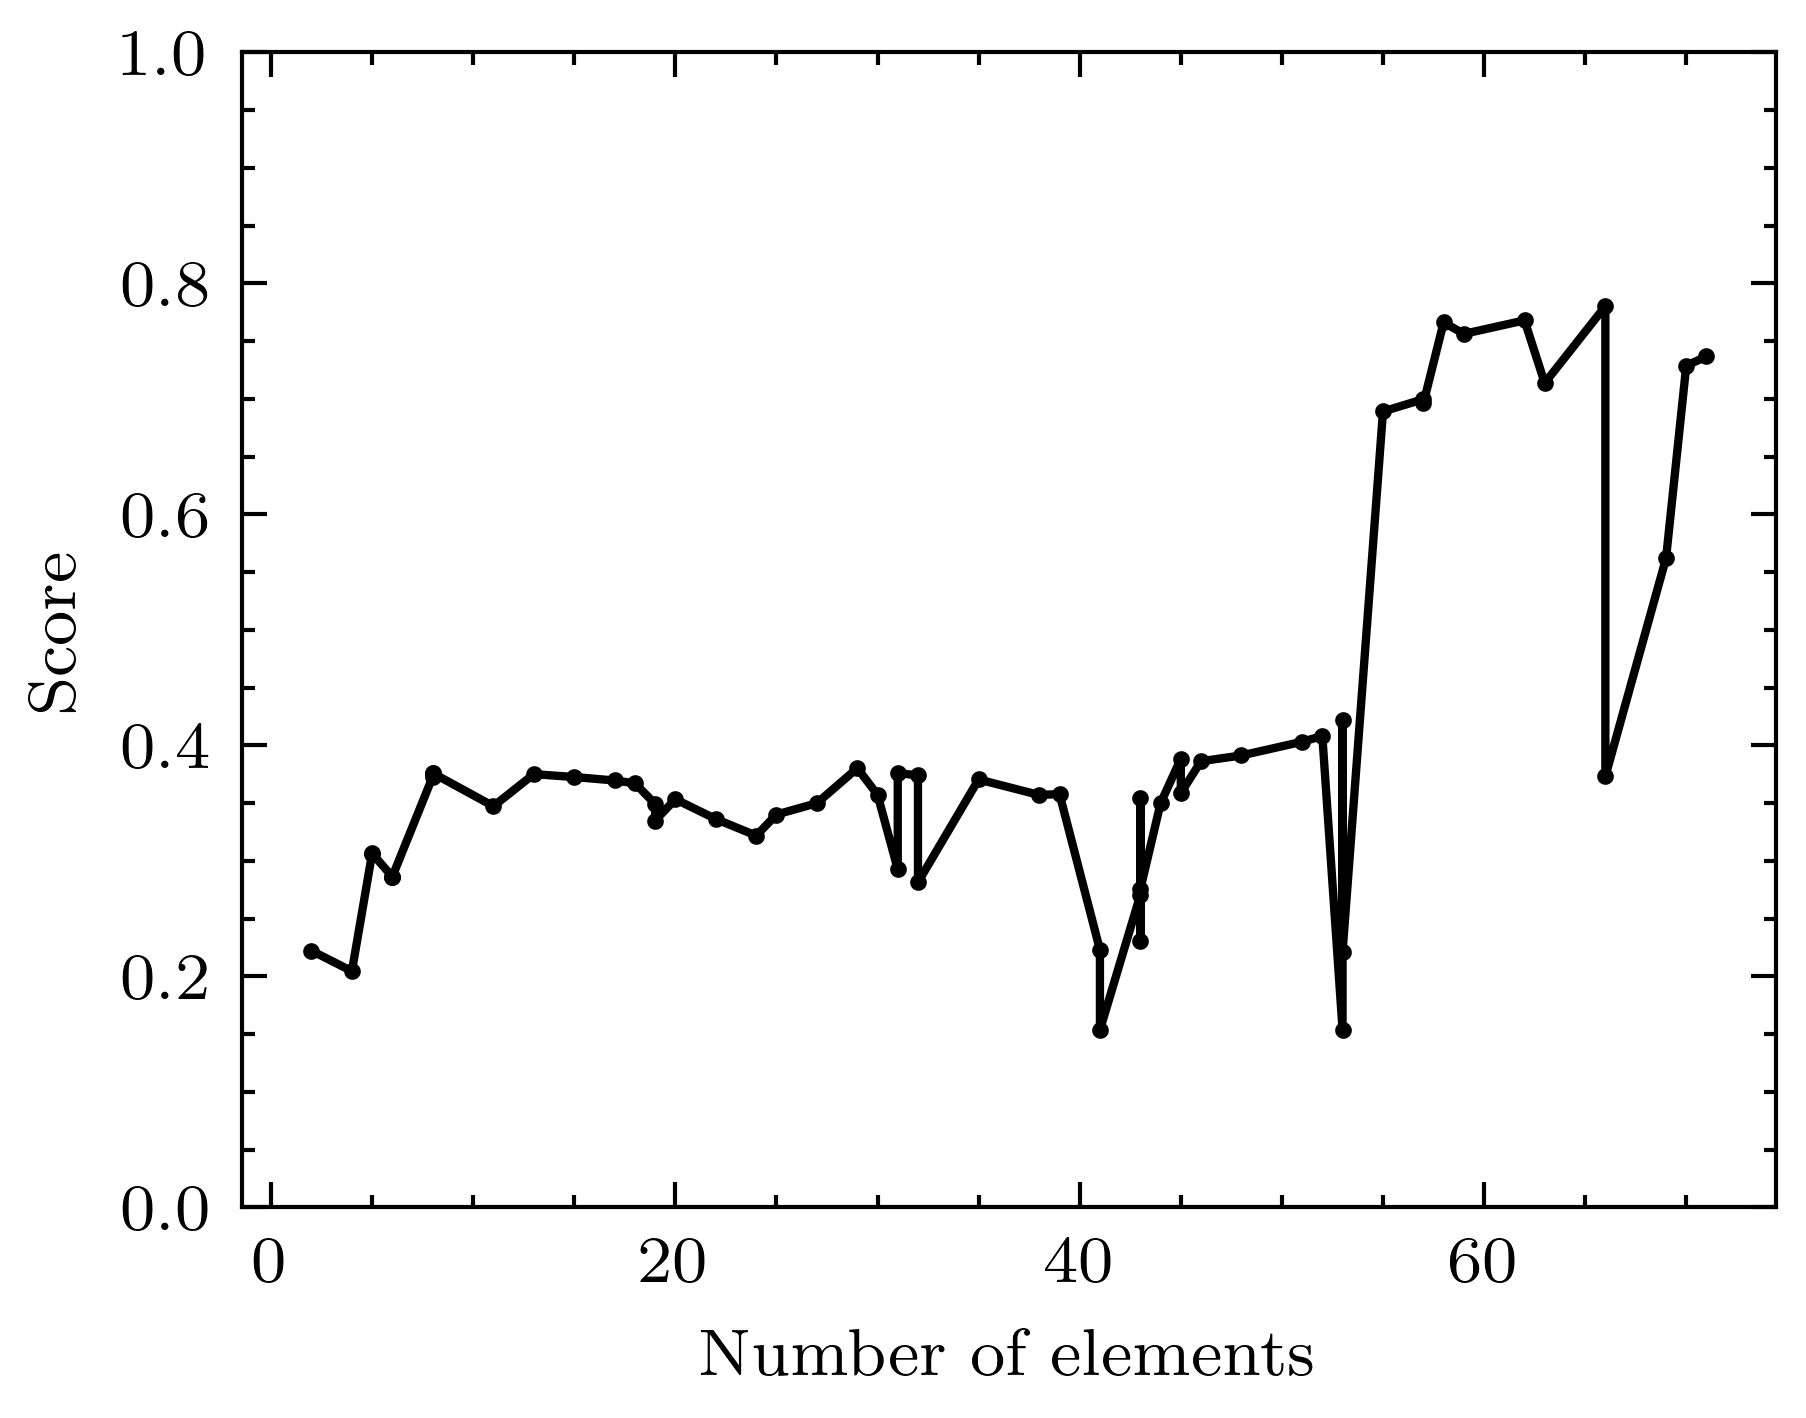

In [203]:
with plt.style.context(['science', 'ieee']):
    plt.plot(treshold_variance_stats['n_features'], treshold_variance_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

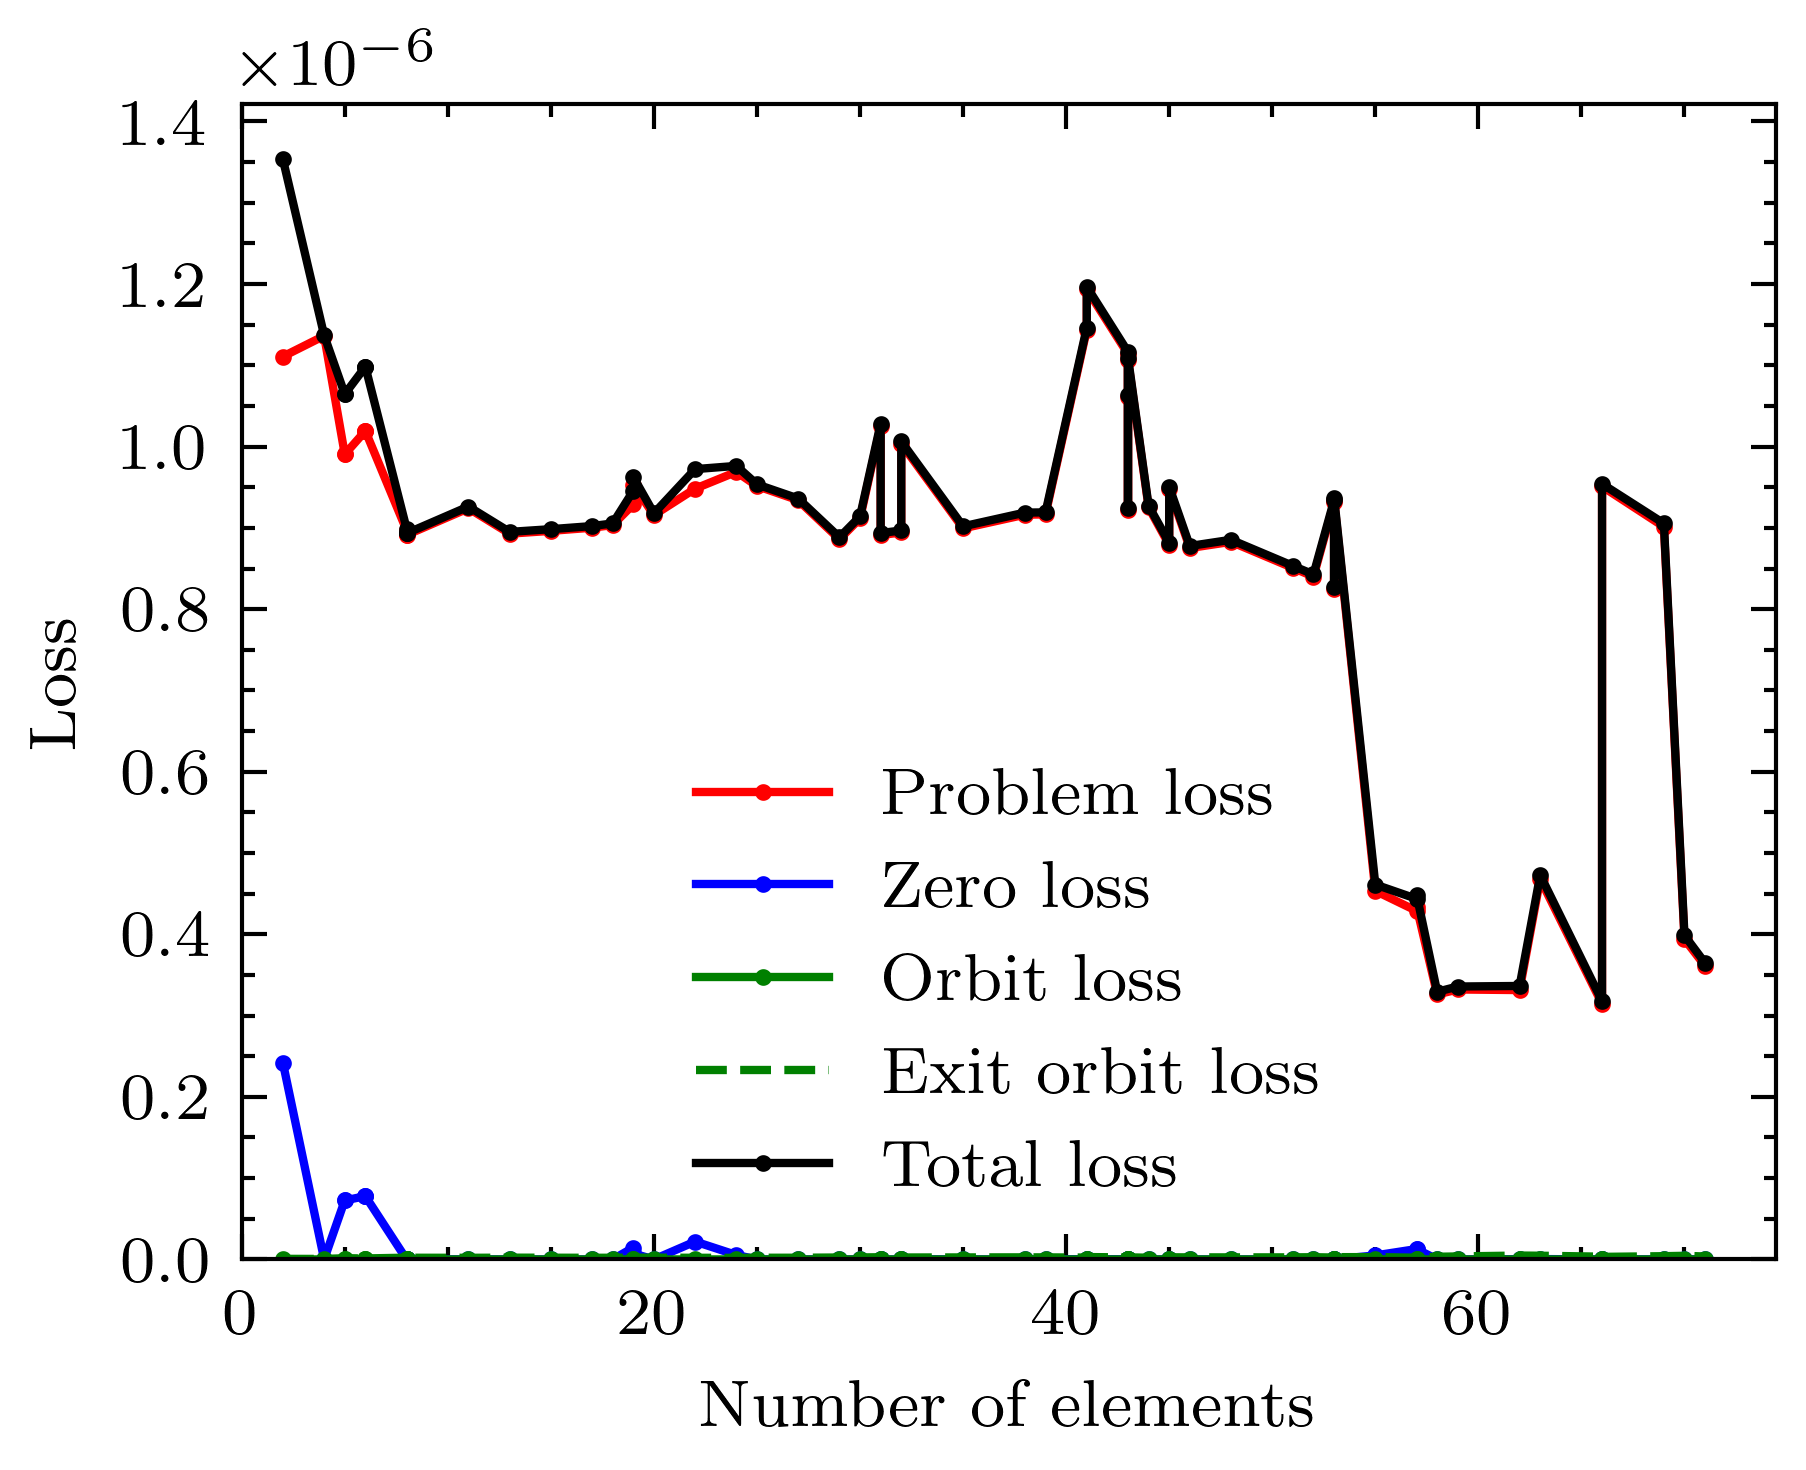

In [204]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y7**

In [248]:
FOLDER = "Y7_threshold_variance"

tmp = gather_data3(FOLDER)
treshold_variance_stats = tmp.sort_values(by = ['n_features'])
treshold_variance_stats['problem_loss'] = treshold_variance_stats.total_loss - treshold_variance_stats.orbit_loss - treshold_variance_stats.zero_loss - treshold_variance_stats.exit_orbit_loss

print(treshold_variance_stats)

Found 60 files.
         Regularization         alpha  n_features  \
33  regularizer_mod_5_4  5.000000e-07           2   
21  regularizer_mod_5_4  5.000000e-07           4   
36  regularizer_mod_5_4  5.000000e-07           5   
37  regularizer_mod_5_4  5.000000e-07           5   
25  regularizer_mod_5_4  5.000000e-07           6   
22  regularizer_mod_5_4  5.000000e-07           6   
52  regularizer_mod_5_4  5.000000e-07           6   
27  regularizer_mod_5_4  5.000000e-07           8   
53  regularizer_mod_5_4  5.000000e-07           8   
6   regularizer_mod_5_4  5.000000e-07           8   
40  regularizer_mod_5_4  5.000000e-07           8   
28  regularizer_mod_5_4  5.000000e-07          11   
11  regularizer_mod_5_4  5.000000e-07          13   
48  regularizer_mod_5_4  5.000000e-07          15   
0   regularizer_mod_5_4  5.000000e-07          17   
49  regularizer_mod_5_4  5.000000e-07          18   
54  regularizer_mod_5_4  5.000000e-07          19   
42  regularizer_mod_5_4  5.000

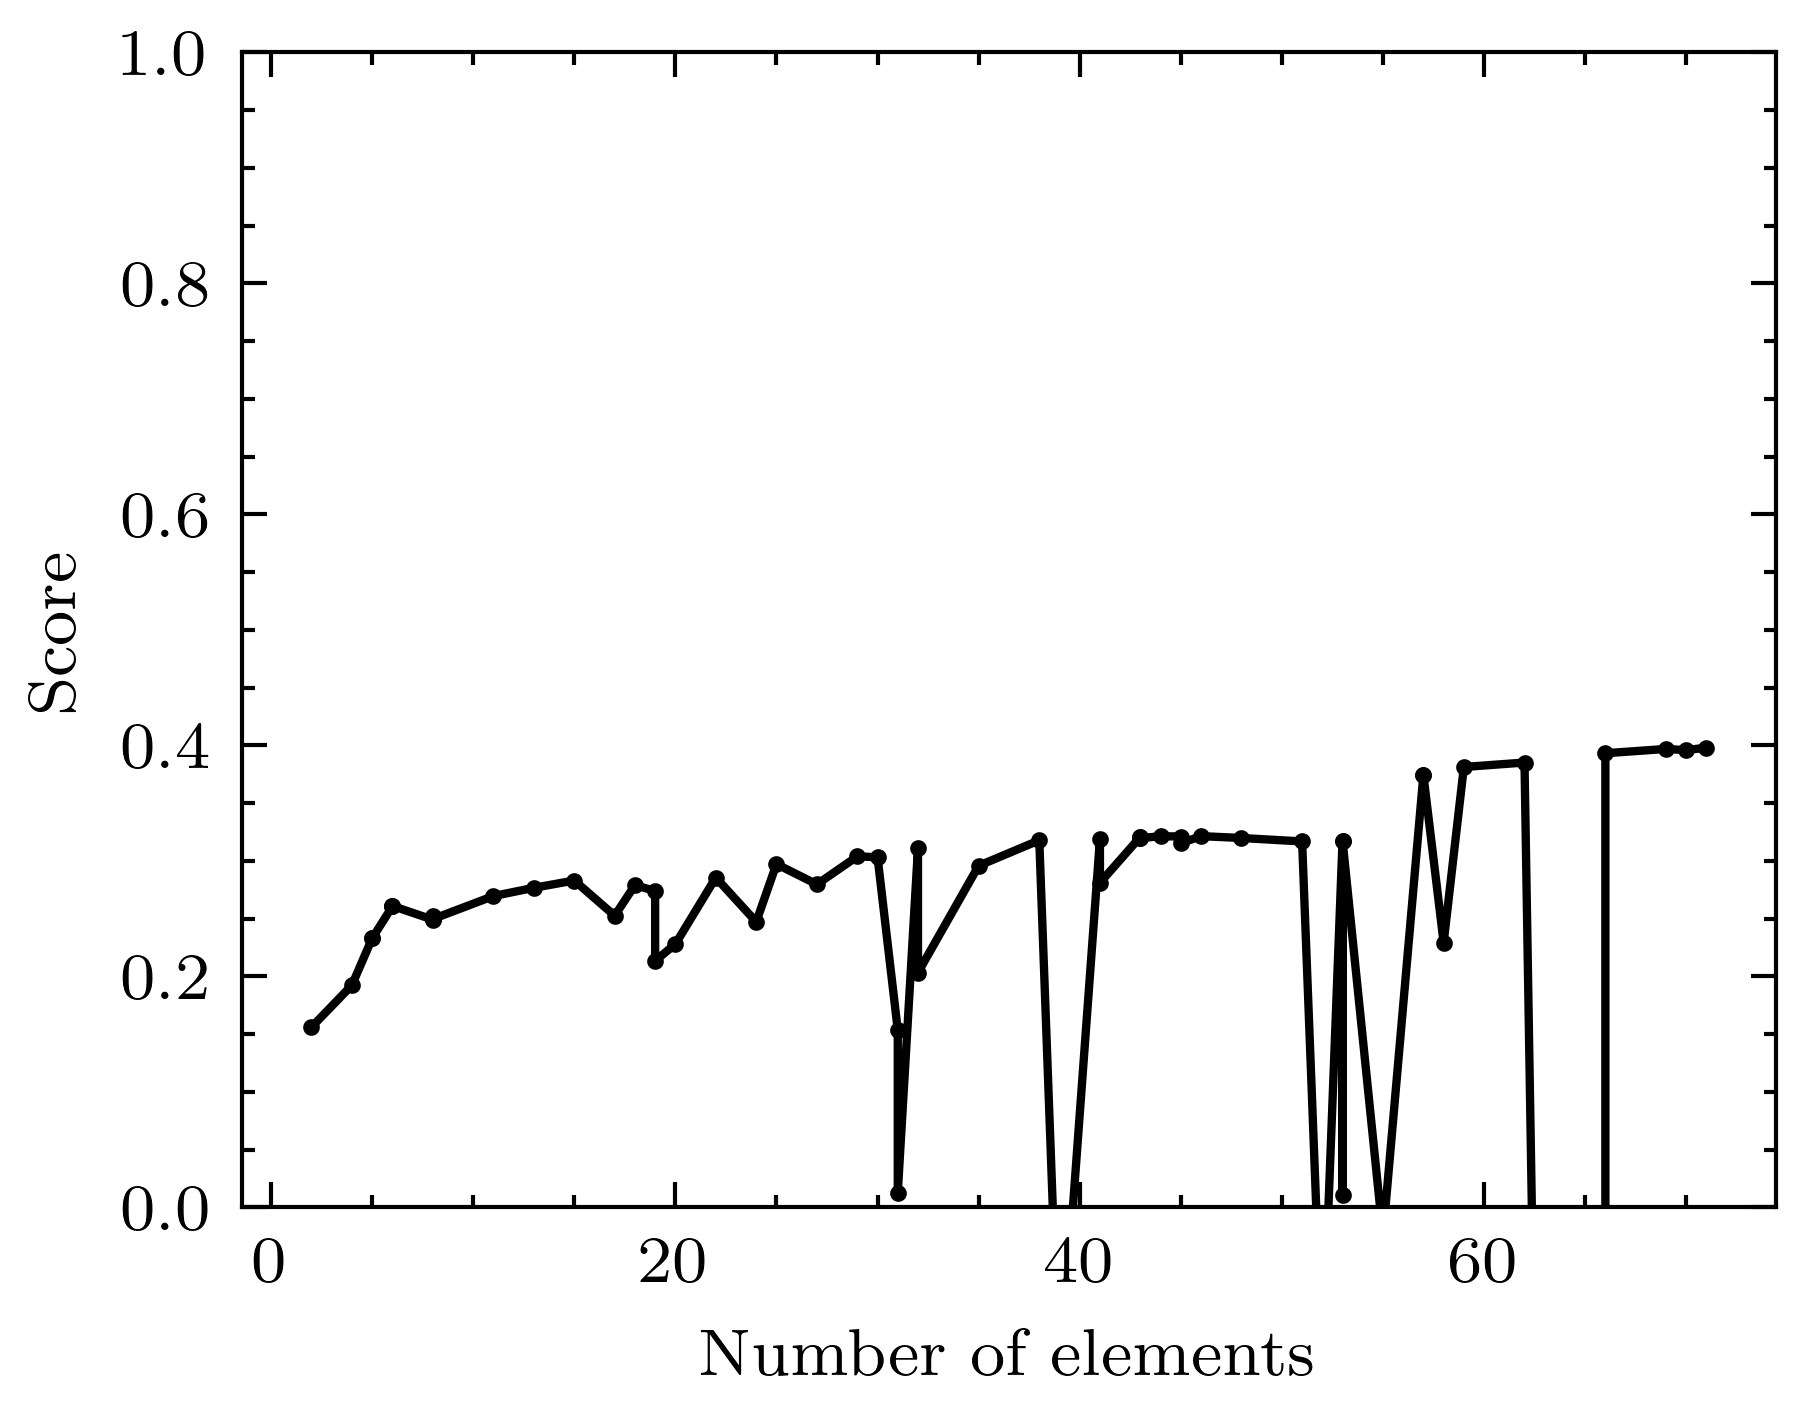

In [249]:
with plt.style.context(['science', 'ieee']):
    plt.plot(treshold_variance_stats['n_features'], treshold_variance_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

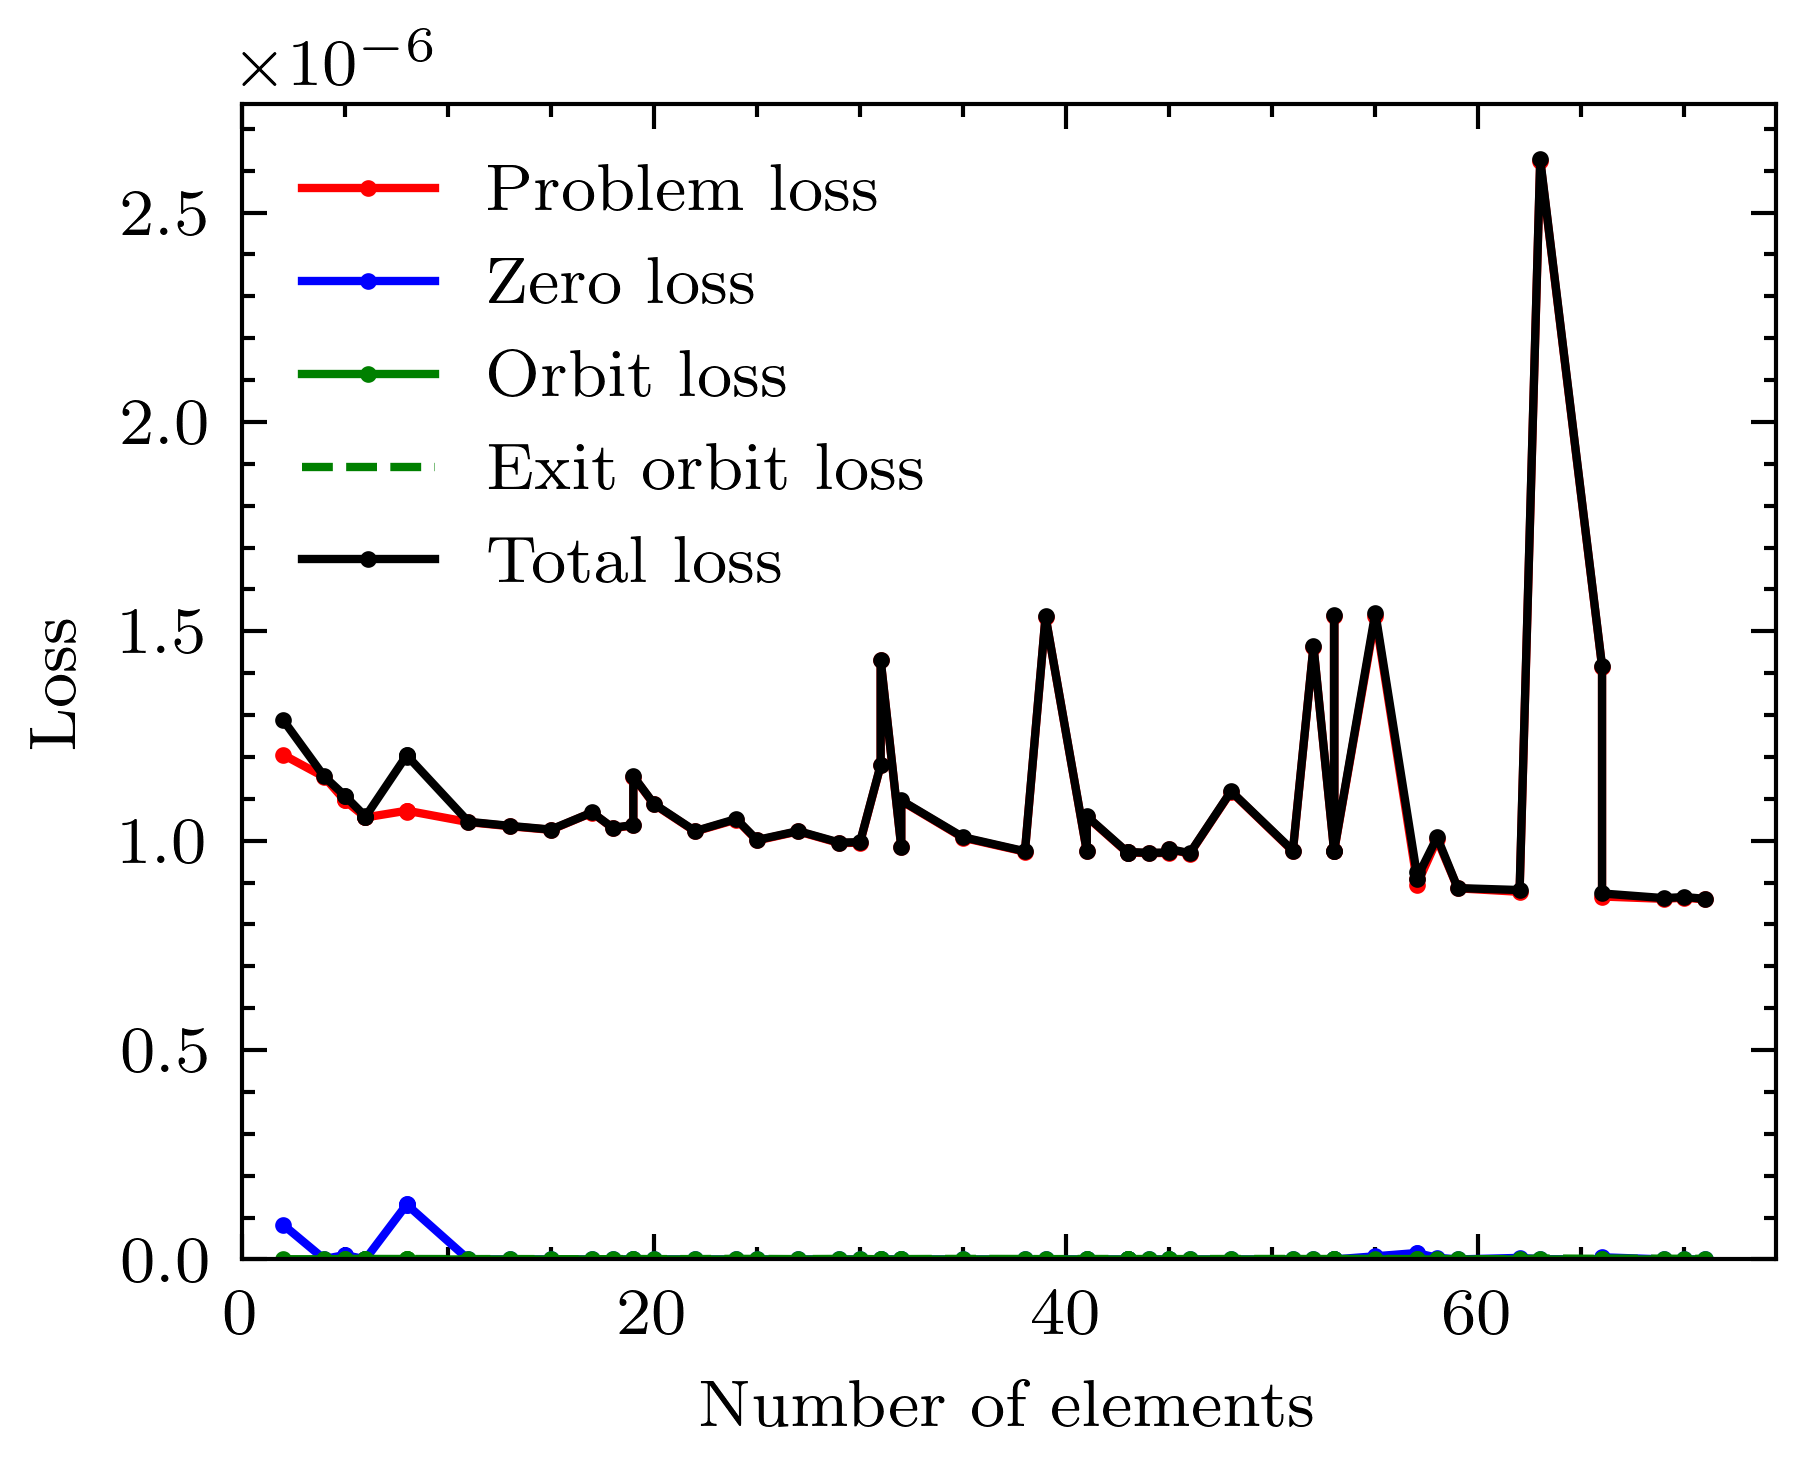

In [250]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y8**

In [258]:
FOLDER = "Y8_threshold_variance"

tmp = gather_data3(FOLDER)
treshold_variance_stats = tmp.sort_values(by = ['n_features'])
treshold_variance_stats['problem_loss'] = treshold_variance_stats.total_loss - treshold_variance_stats.orbit_loss - treshold_variance_stats.zero_loss - treshold_variance_stats.exit_orbit_loss

print(treshold_variance_stats)

Found 60 files.
         Regularization         alpha  n_features  \
57  regularizer_mod_5_4  5.000000e-07           2   
32  regularizer_mod_5_4  5.000000e-07           4   
43  regularizer_mod_5_4  5.000000e-07           5   
55  regularizer_mod_5_4  5.000000e-07           5   
13  regularizer_mod_5_4  5.000000e-07           6   
59  regularizer_mod_5_4  5.000000e-07           6   
2   regularizer_mod_5_4  5.000000e-07           6   
33  regularizer_mod_5_4  5.000000e-07           8   
28  regularizer_mod_5_4  5.000000e-07           8   
30  regularizer_mod_5_4  5.000000e-07           8   
14  regularizer_mod_5_4  5.000000e-07           8   
38  regularizer_mod_5_4  5.000000e-07          11   
26  regularizer_mod_5_4  5.000000e-07          13   
15  regularizer_mod_5_4  5.000000e-07          15   
44  regularizer_mod_5_4  5.000000e-07          17   
6   regularizer_mod_5_4  5.000000e-07          18   
39  regularizer_mod_5_4  5.000000e-07          19   
45  regularizer_mod_5_4  5.000

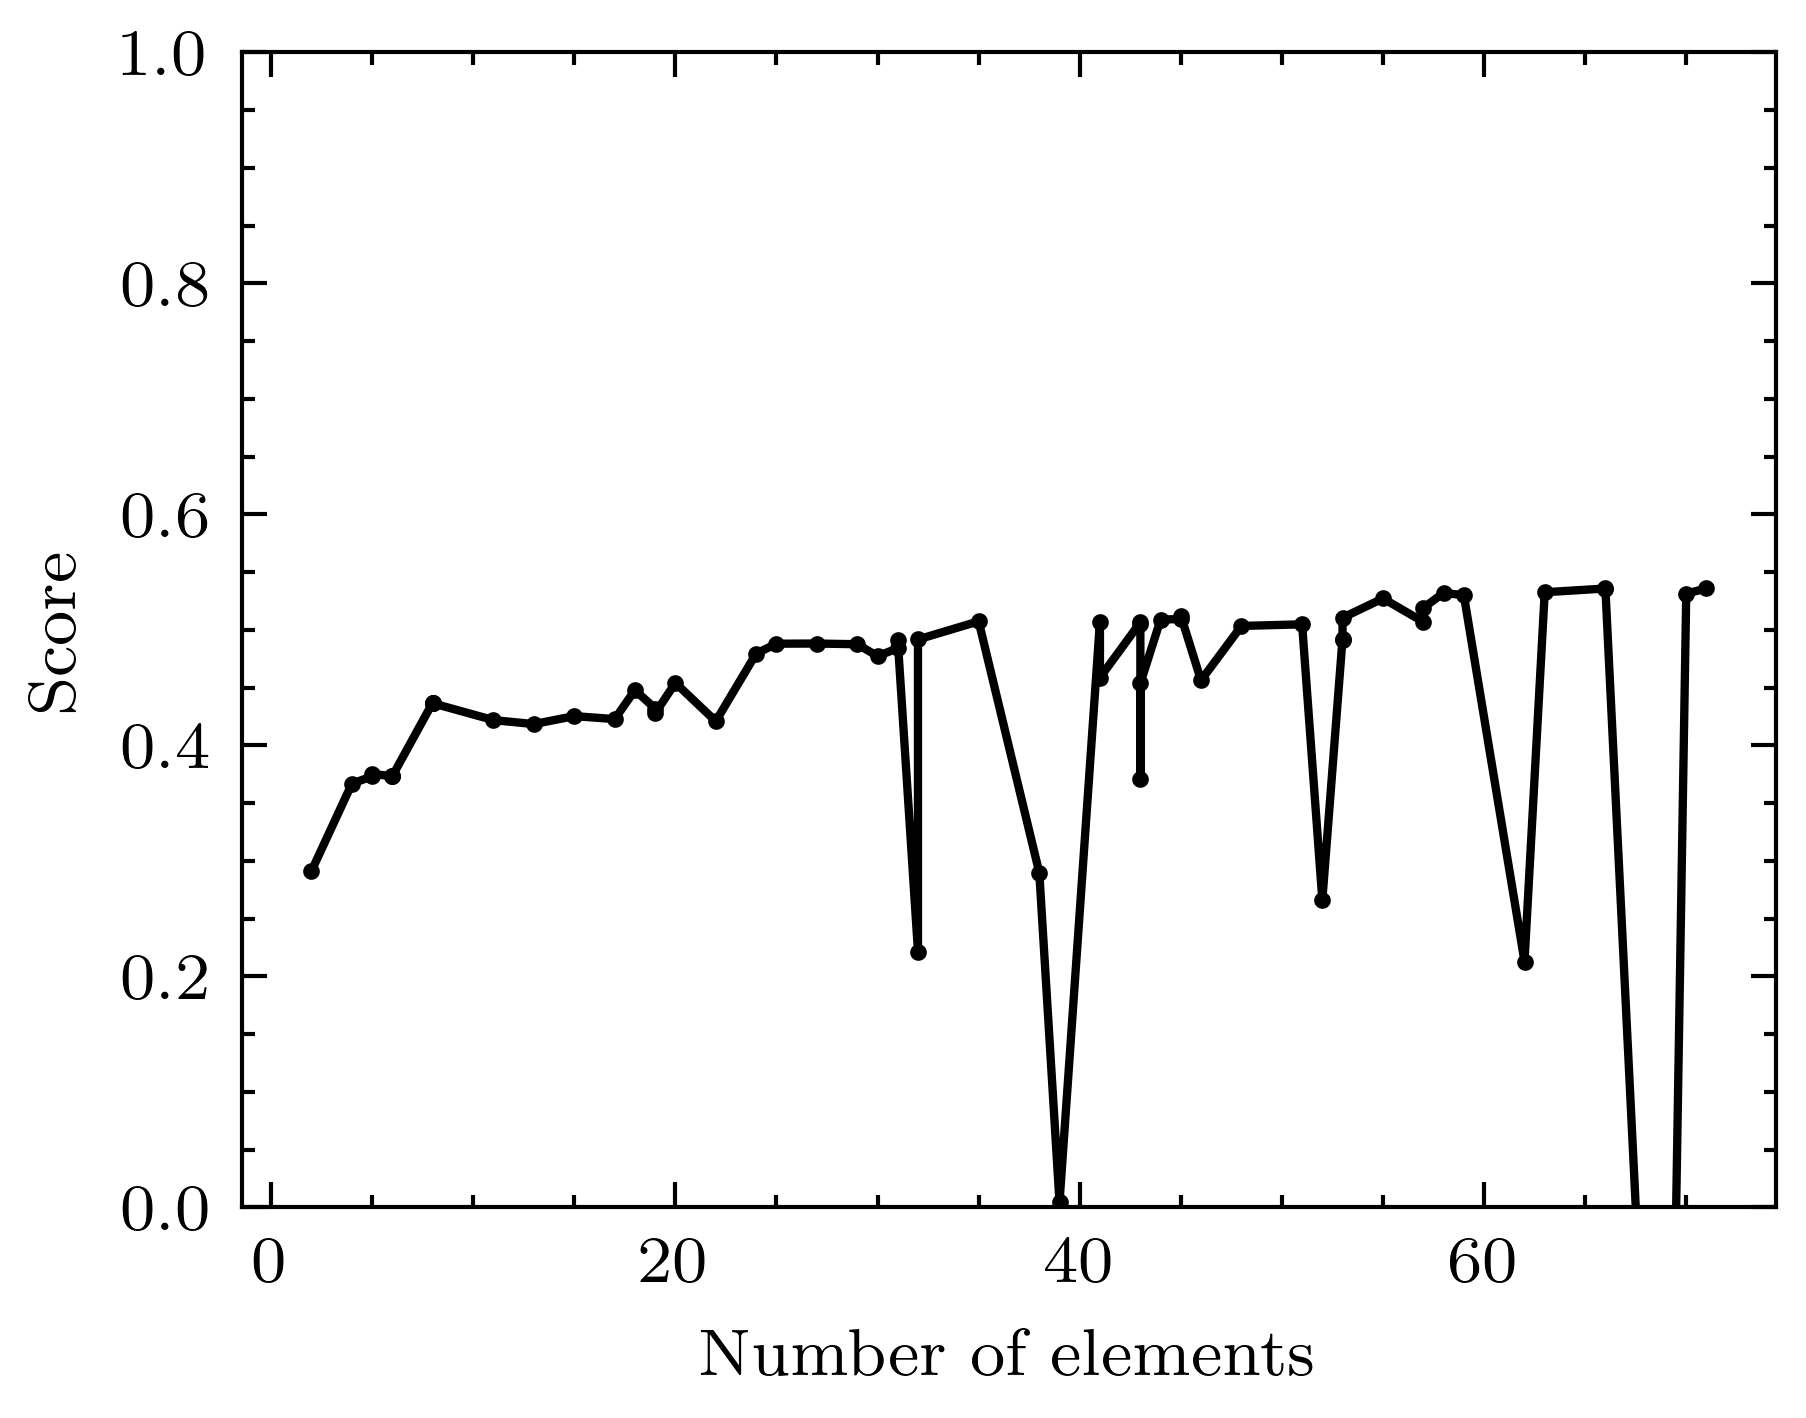

In [259]:
with plt.style.context(['science', 'ieee']):
    plt.plot(treshold_variance_stats['n_features'], treshold_variance_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

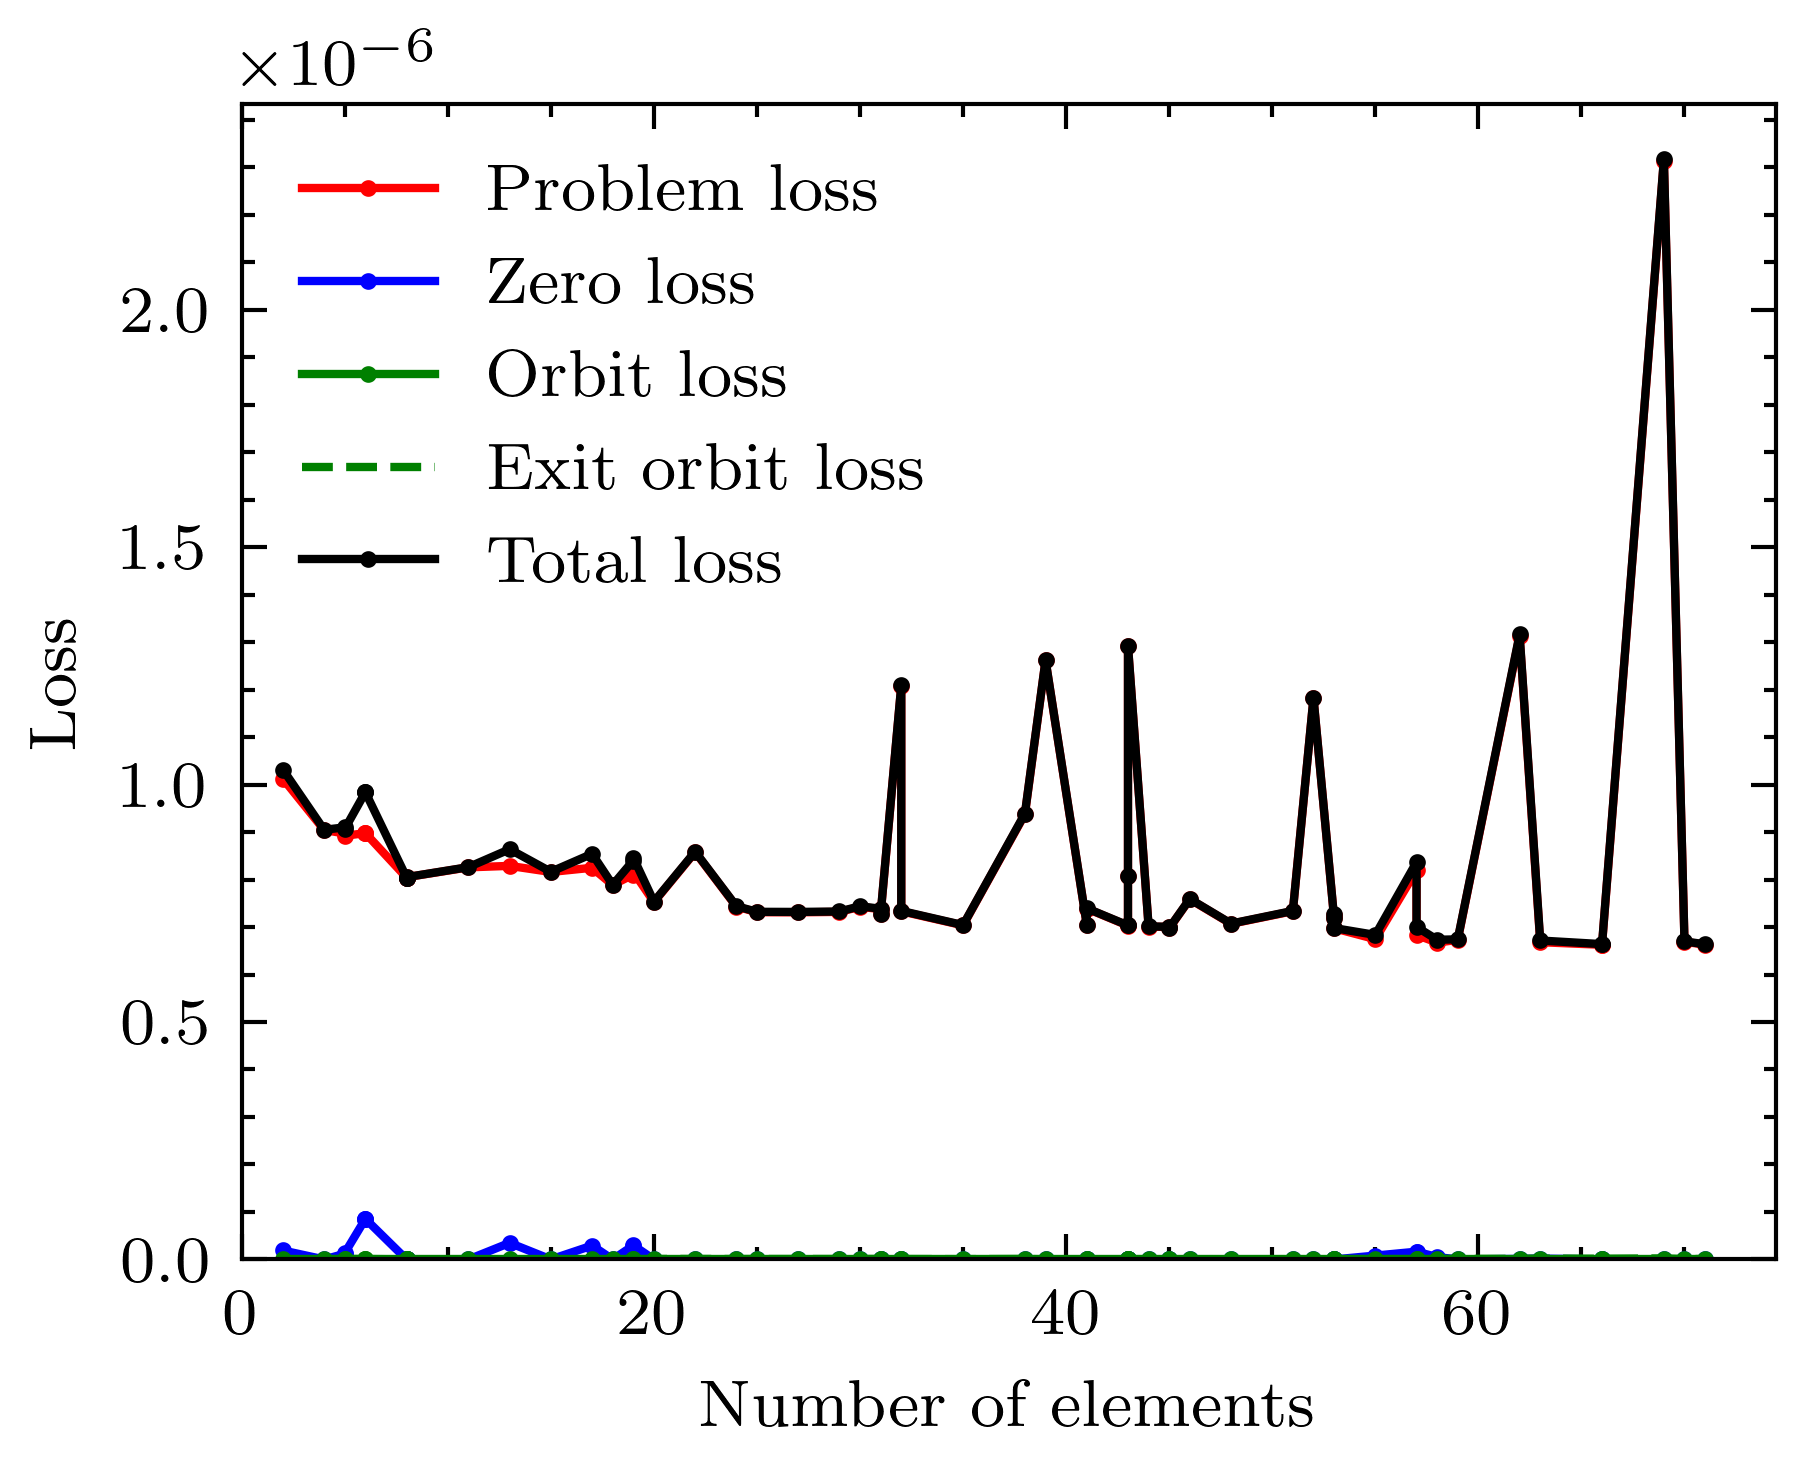

In [260]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y9**

In [272]:
FOLDER = "Y9_threshold_variance"

tmp = gather_data3(FOLDER)
treshold_variance_stats = tmp.sort_values(by = ['n_features'])
treshold_variance_stats['problem_loss'] = treshold_variance_stats.total_loss - treshold_variance_stats.orbit_loss - treshold_variance_stats.zero_loss - treshold_variance_stats.exit_orbit_loss

print(treshold_variance_stats)

Found 60 files.
         Regularization         alpha  n_features  \
18  regularizer_mod_5_4  5.000000e-07           2   
23  regularizer_mod_5_4  5.000000e-07           4   
5   regularizer_mod_5_4  5.000000e-07           5   
0   regularizer_mod_5_4  5.000000e-07           5   
47  regularizer_mod_5_4  5.000000e-07           6   
43  regularizer_mod_5_4  5.000000e-07           6   
20  regularizer_mod_5_4  5.000000e-07           6   
2   regularizer_mod_5_4  5.000000e-07           8   
57  regularizer_mod_5_4  5.000000e-07           8   
13  regularizer_mod_5_4  5.000000e-07           8   
37  regularizer_mod_5_4  5.000000e-07           8   
46  regularizer_mod_5_4  5.000000e-07          11   
21  regularizer_mod_5_4  5.000000e-07          13   
52  regularizer_mod_5_4  5.000000e-07          15   
36  regularizer_mod_5_4  5.000000e-07          17   
31  regularizer_mod_5_4  5.000000e-07          18   
33  regularizer_mod_5_4  5.000000e-07          19   
59  regularizer_mod_5_4  5.000

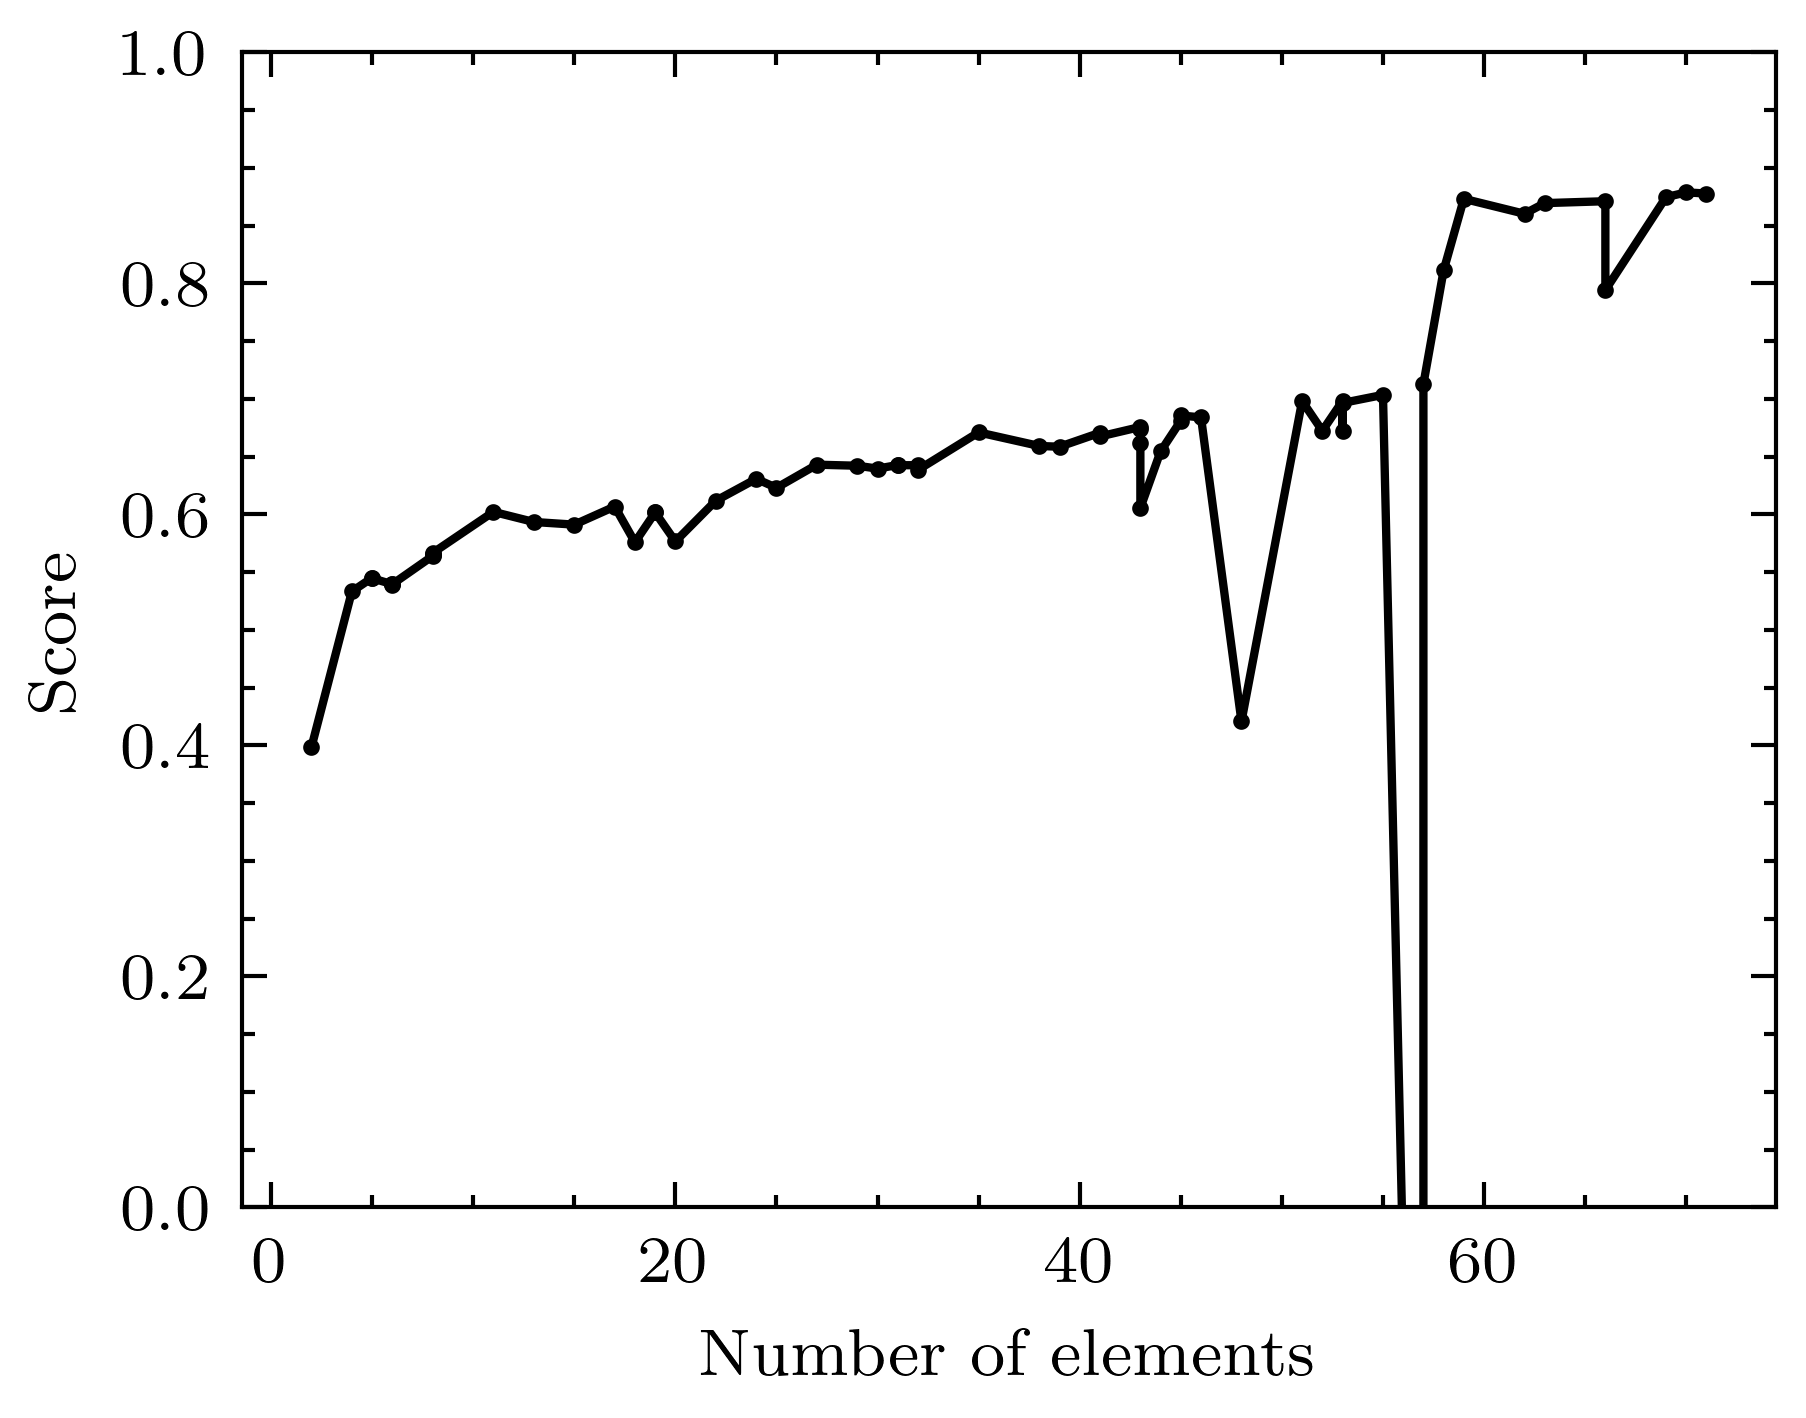

In [273]:
with plt.style.context(['science', 'ieee']):
    plt.plot(treshold_variance_stats['n_features'], treshold_variance_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

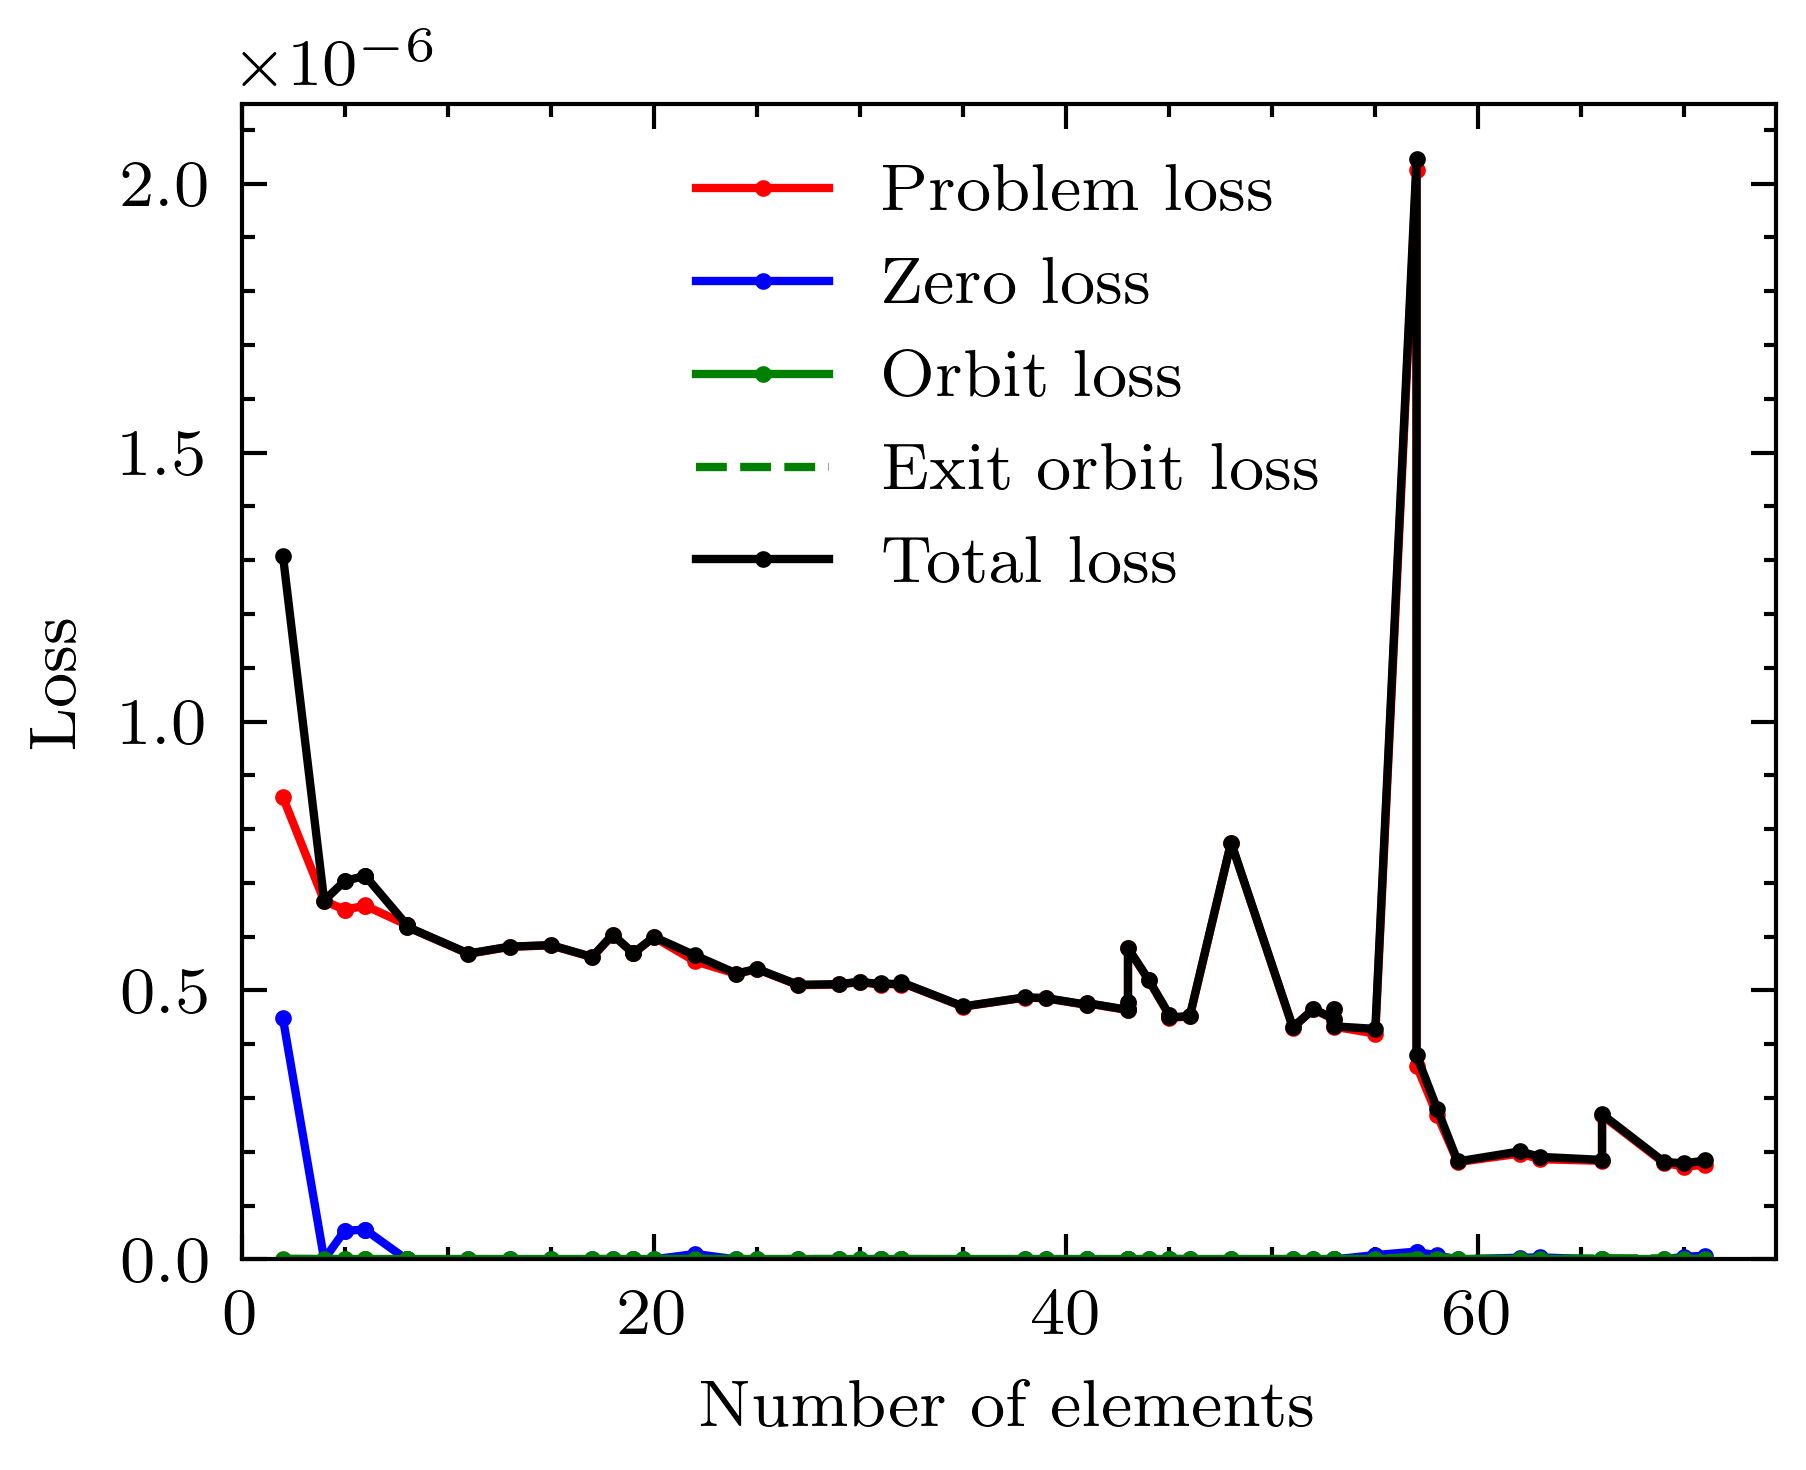

In [274]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y10**

In [291]:
FOLDER = "Y10_threshold_variance"

tmp = gather_data3(FOLDER)
treshold_variance_stats = tmp.sort_values(by = ['n_features'])
treshold_variance_stats['problem_loss'] = treshold_variance_stats.total_loss - treshold_variance_stats.orbit_loss - treshold_variance_stats.zero_loss - treshold_variance_stats.exit_orbit_loss

print(treshold_variance_stats)

Found 60 files.
         Regularization         alpha  n_features  \
26  regularizer_mod_5_4  5.000000e-07           2   
18  regularizer_mod_5_4  5.000000e-07           4   
58  regularizer_mod_5_4  5.000000e-07           5   
20  regularizer_mod_5_4  5.000000e-07           5   
59  regularizer_mod_5_4  5.000000e-07           6   
38  regularizer_mod_5_4  5.000000e-07           6   
21  regularizer_mod_5_4  5.000000e-07           6   
56  regularizer_mod_5_4  5.000000e-07           8   
34  regularizer_mod_5_4  5.000000e-07           8   
10  regularizer_mod_5_4  5.000000e-07           8   
29  regularizer_mod_5_4  5.000000e-07           8   
7   regularizer_mod_5_4  5.000000e-07          11   
57  regularizer_mod_5_4  5.000000e-07          13   
24  regularizer_mod_5_4  5.000000e-07          15   
31  regularizer_mod_5_4  5.000000e-07          17   
44  regularizer_mod_5_4  5.000000e-07          18   
14  regularizer_mod_5_4  5.000000e-07          19   
36  regularizer_mod_5_4  5.000

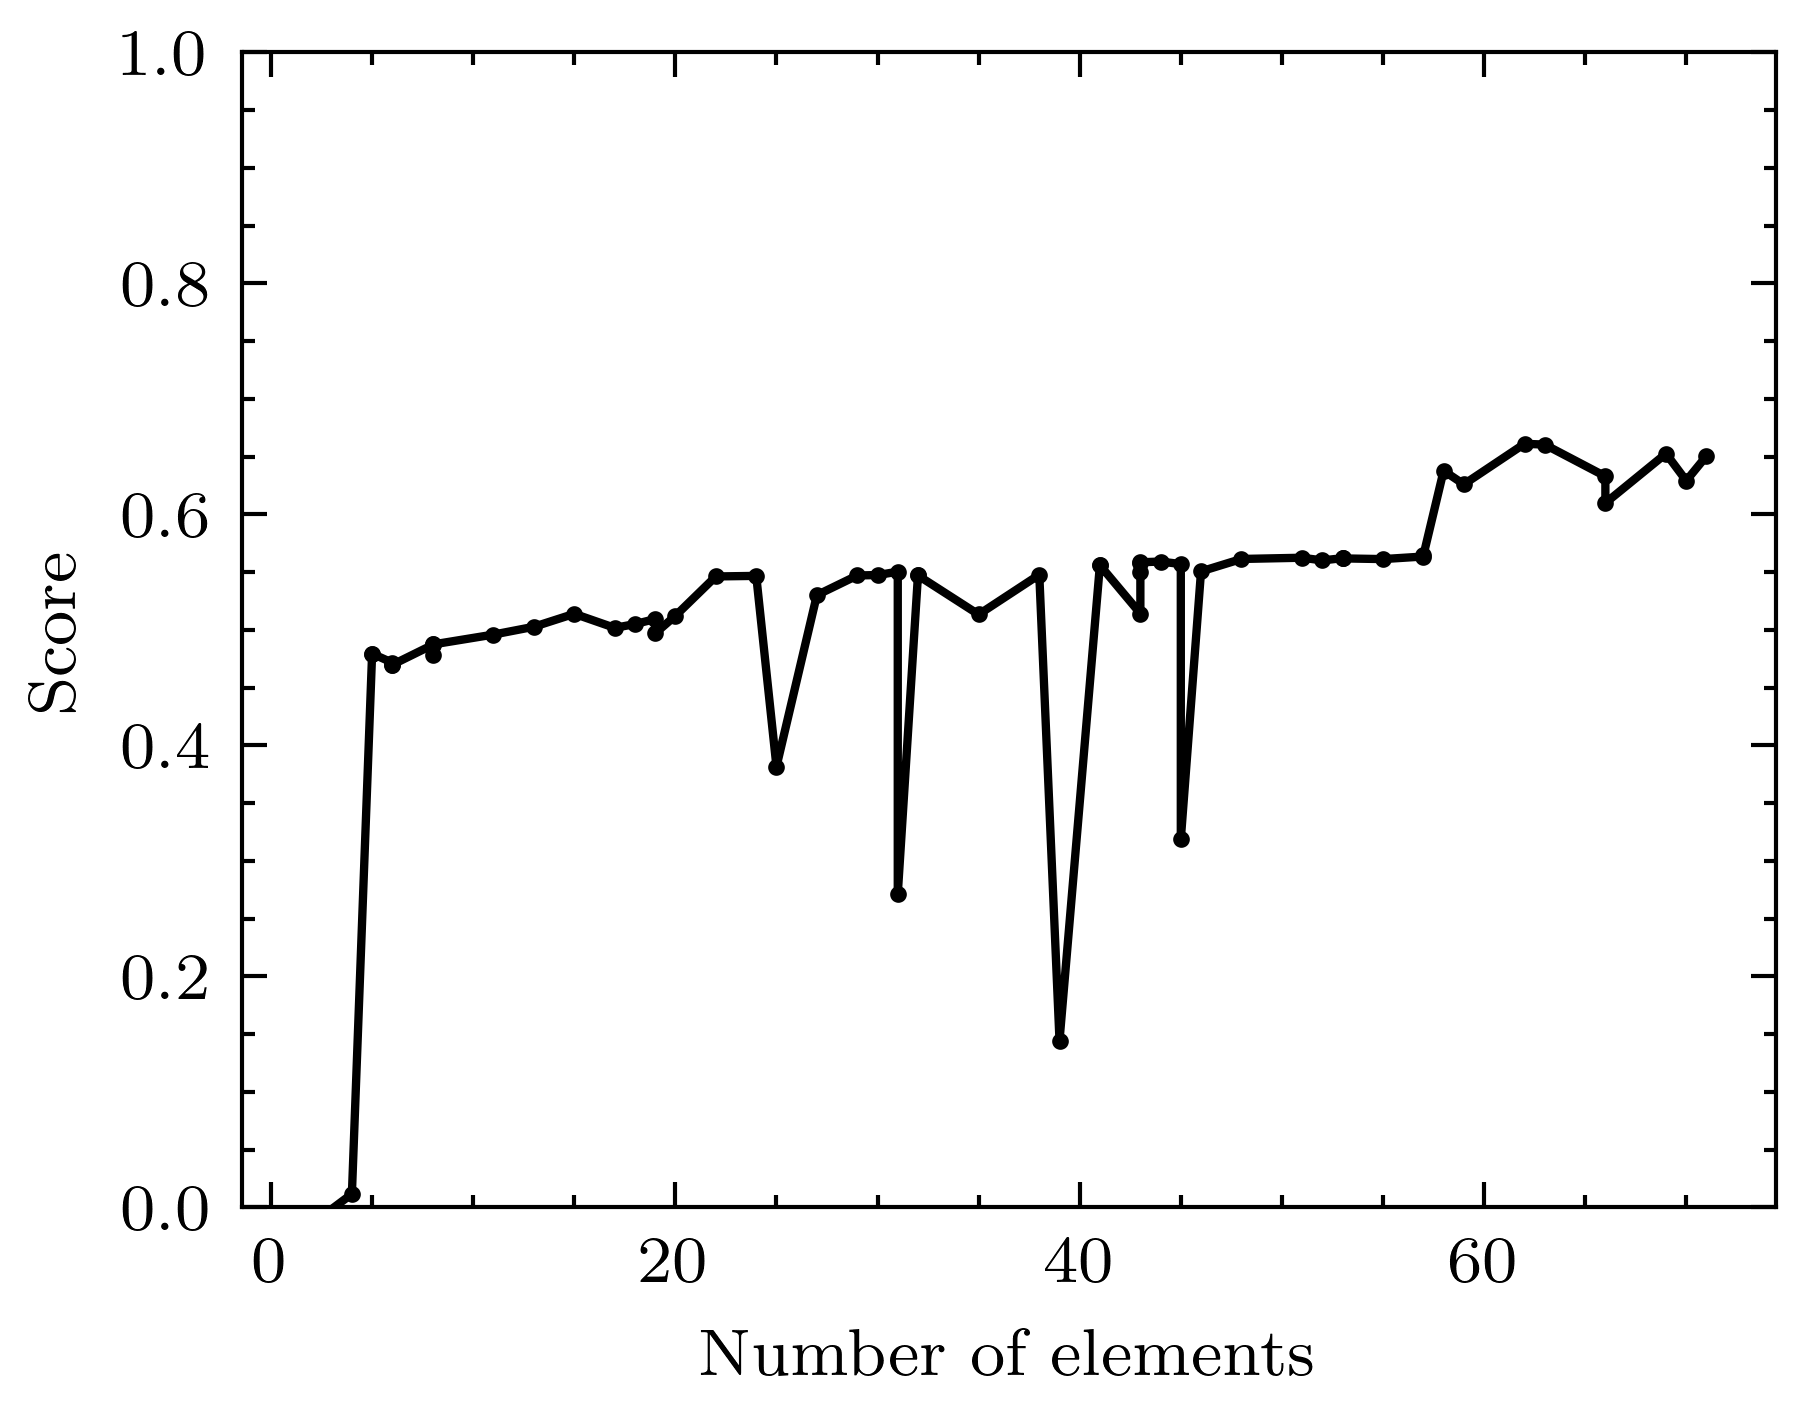

In [292]:
with plt.style.context(['science', 'ieee']):
    plt.plot(treshold_variance_stats['n_features'], treshold_variance_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

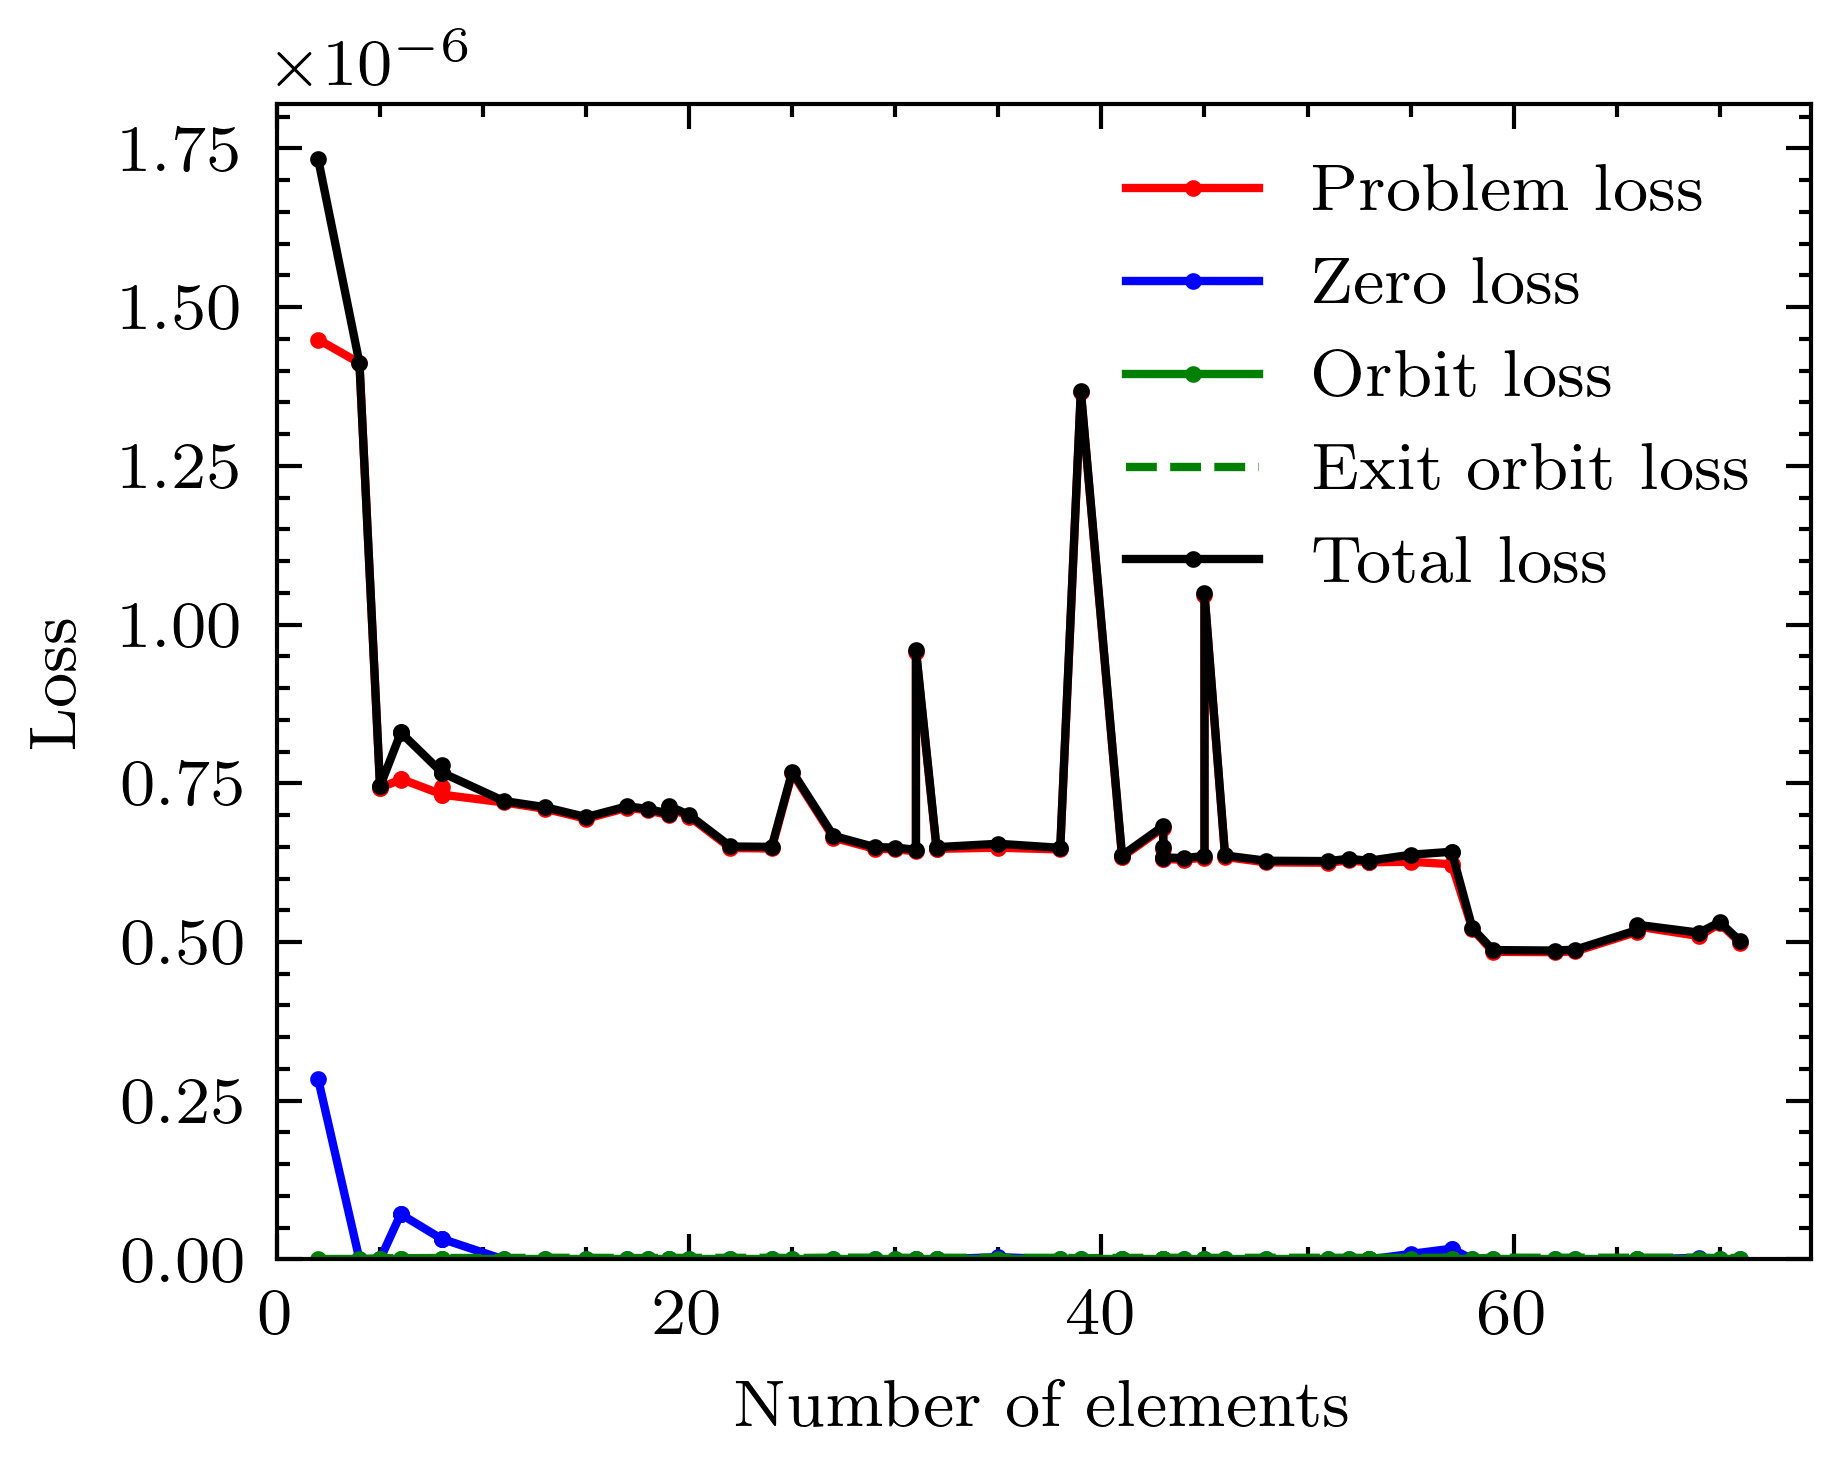

In [293]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(treshold_variance_stats.n_features, treshold_variance_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0)
    plt.ylim(0.0, )
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()